In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_rows', 100000)

In [3]:
df = pd.read_excel('aspiring_minds_employability_outcomes_2015.xlsx')

In [4]:
df.shape

(3998, 39)

In [5]:
df.drop(['Unnamed: 0','ID','CollegeID','CollegeCityID'],axis = 1,inplace = True)

In [6]:
for col in df.columns:
    print(col, df[col].value_counts())

Salary 300000     293
180000     239
200000     205
325000     188
120000     165
240000     158
400000     130
350000     125
100000     111
150000      87
360000      75
320000      74
450000      67
145000      64
500000      63
310000      61
335000      61
330000      57
250000      56
220000      54
315000      53
420000      49
105000      49
305000      43
340000      42
110000      39
205000      38
275000      38
280000      38
95000       36
600000      35
380000      35
225000      34
215000      34
210000      33
480000      27
375000      27
370000      26
140000      25
430000      23
170000      23
405000      23
190000      23
160000      22
410000      22
345000      22
390000      22
550000      21
415000      21
440000      20
265000      19
470000      19
460000      19
260000      18
195000      17
700000      17
445000      16
290000      16
230000      15
425000      14
175000      14
185000      14
115000      13
650000      13
520000      13
130000      13
355

In [7]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>0.1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100, 4),  ' % missing values')

In [8]:
df.shape

(3998, 35)

In [9]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape

(3998, 35)

In [10]:
df['YOJ'] = df['DOJ'].apply(lambda x: x.year)
df['YOJ'].astype('int64')

0       2012
1       2013
2       2014
3       2011
4       2014
5       2014
6       2014
7       2014
8       2013
9       2014
10      2011
11      2011
12      2013
13      2014
14      2013
15      2013
16      2014
17      2013
18      2014
19      2014
20      2010
21      2012
22      2013
23      2014
24      2014
25      2012
26      2011
27      2014
28      2015
29      2014
30      2011
31      2014
32      2013
33      2014
34      2015
35      2014
36      2013
37      2010
38      2014
39      2013
40      2011
41      2014
42      2014
43      2014
44      2012
45      2014
46      2013
47      2012
48      2013
49      2012
50      2011
51      2015
52      2015
53      2014
54      2014
55      2014
56      2013
57      2012
58      2013
59      2009
60      2013
61      2014
62      2014
63      2014
64      2010
65      2014
66      2011
67      2014
68      2010
69      2015
70      2014
71      2014
72      2014
73      2014
74      2015
75      2014
76      2012

In [11]:
df.DOL.value_counts()
df.DOL = df.DOL.replace('present', np.nan)
df.DOL.value_counts(dropna=False)
df.DOL = df.DOL.fillna(pd.Timestamp.today())
df.DOL.value_counts(dropna=False)


2021-11-14 13:31:11.136938    1875
2015-04-01 00:00:00.000000     573
2015-03-01 00:00:00.000000     124
2015-05-01 00:00:00.000000     112
2015-01-01 00:00:00.000000      99
2014-04-01 00:00:00.000000      82
2015-02-01 00:00:00.000000      69
2014-06-01 00:00:00.000000      67
2014-09-01 00:00:00.000000      64
2014-08-01 00:00:00.000000      63
2014-12-01 00:00:00.000000      53
2014-07-01 00:00:00.000000      52
2014-05-01 00:00:00.000000      52
2014-02-01 00:00:00.000000      49
2014-01-01 00:00:00.000000      46
2014-10-01 00:00:00.000000      44
2014-03-01 00:00:00.000000      39
2014-11-01 00:00:00.000000      35
2013-07-01 00:00:00.000000      31
2013-05-01 00:00:00.000000      29
2015-06-01 00:00:00.000000      26
2015-07-01 00:00:00.000000      26
2013-12-01 00:00:00.000000      25
2013-08-01 00:00:00.000000      24
2013-09-01 00:00:00.000000      23
2013-02-01 00:00:00.000000      21
2013-01-01 00:00:00.000000      20
2013-10-01 00:00:00.000000      18
2013-03-01 00:00:00.

In [12]:
df['YOL'] = df['DOL'].apply(lambda x: x.year)
df['YOL'].astype('int64')

0       2021
1       2021
2       2021
3       2021
4       2015
5       2021
6       2015
7       2015
8       2021
9       2021
10      2015
11      2014
12      2021
13      2021
14      2021
15      2021
16      2021
17      2014
18      2014
19      2021
20      2012
21      2013
22      2015
23      2015
24      2015
25      2021
26      2013
27      2015
28      2015
29      2014
30      2021
31      2015
32      2021
33      2021
34      2021
35      2021
36      2021
37      2015
38      2021
39      2013
40      2012
41      2014
42      2021
43      2015
44      2015
45      2015
46      2015
47      2013
48      2021
49      2014
50      2013
51      2021
52      2021
53      2021
54      2021
55      2021
56      2021
57      2021
58      2014
59      2013
60      2021
61      2015
62      2021
63      2015
64      2012
65      2014
66      2013
67      2015
68      2012
69      2021
70      2021
71      2021
72      2015
73      2015
74      2015
75      2021
76      2021

In [13]:
df.DOL = df.DOL.dt.date
df.DOL = pd.to_datetime(df.DOL)
df.DOL

0      2021-11-14
1      2021-11-14
2      2021-11-14
3      2021-11-14
4      2015-03-01
5      2021-11-14
6      2015-05-01
7      2015-07-01
8      2021-11-14
9      2021-11-14
10     2015-04-01
11     2014-10-01
12     2021-11-14
13     2021-11-14
14     2021-11-14
15     2021-11-14
16     2021-11-14
17     2014-09-01
18     2014-06-01
19     2021-11-14
20     2012-09-01
21     2013-12-01
22     2015-04-01
23     2015-04-01
24     2015-06-01
25     2021-11-14
26     2013-10-01
27     2015-01-01
28     2015-04-01
29     2014-04-01
30     2021-11-14
31     2015-04-01
32     2021-11-14
33     2021-11-14
34     2021-11-14
35     2021-11-14
36     2021-11-14
37     2015-04-01
38     2021-11-14
39     2013-06-01
40     2012-03-01
41     2014-09-01
42     2021-11-14
43     2015-04-01
44     2015-04-01
45     2015-01-01
46     2015-04-01
47     2013-10-01
48     2021-11-14
49     2014-07-01
50     2013-02-01
51     2021-11-14
52     2021-11-14
53     2021-11-14
54     2021-11-14
55     202

In [14]:
df['survived_in_Year'] = df['YOL'] - df['YOJ']
df['survived_in_Year'].value_counts()

1     1071
7      875
2      442
8      437
0      319
9      225
3      195
6      166
10     124
4       78
11      46
5       17
14       1
30       1
15       1
Name: survived_in_Year, dtype: int64

In [15]:
df.columns 

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'YOJ', 'YOL', 'survived_in_Year'],
      dtype='object')

In [16]:
df.drop(['DOL','DOJ','YOL','YOJ'],axis = 1,inplace = True)

In [17]:
df.JobCity.value_counts().head(5)

Bangalore    627
-1           461
Noida        368
Hyderabad    335
Pune         290
Name: JobCity, dtype: int64

In [18]:
df.JobCity = df.JobCity.replace(-1, np.nan)
df.JobCity = df.JobCity.fillna('Other')

In [19]:
df.loc[(df['JobCity'].str.contains('bang',case=False)) & (df['JobCity'].str.contains('re',case=False)),'JobCity'] = 'Bangalore'
df['JobCity'] = df['JobCity'].str.replace('Bengaluru','Bangalore')
df['JobCity'] = df['JobCity'].str.replace('bengaluru','Bangalore')
df.loc[(df['JobCity'].str.contains('no',case=False)) & (df['JobCity'].str.contains('da',case=False)),'JobCity'] = 'Noida'
df.loc[df['JobCity'].str.contains('hderabad',case=False),'JobCity'] = 'Hyderabad'
df.loc[(df['JobCity'].str.contains('hy',case=False)) & (df['JobCity'].str.contains('bad',case=False)),'JobCity'] = 'Hyderabad'
df.loc[df['JobCity'].str.contains('pune',case=False),'JobCity'] = 'Pune'
df.loc[df['JobCity'].str.contains('nai',case=False),'JobCity'] ='Chennai'
df.loc[df['JobCity'].str.contains('aon',case=False),'JobCity'] ='Gurgaon'
df.loc[df['JobCity'].str.contains('delhi',case=False),'JobCity'] = 'New Delhi'
df.loc[df['JobCity'].str.contains('mumbai',case=False),'JobCity'] = 'Mumbai'
df.loc[df['JobCity'].str.contains('kata',case=False),'JobCity'] = 'Kolkata'
df.loc[df['JobCity'].str.contains('jaipur',case=False),'JobCity'] = 'Jaipur'
df.loc[df['JobCity'].str.contains('sore',case=False),'JobCity'] ='Mysore'
df.loc[df['JobCity'].str.contains('know',case=False),'JobCity'] ='Lucknow'
df.loc[df['JobCity'].str.contains('chandigarh',case=False),'JobCity'] ='Chandigarh'
df.loc[df['JobCity'].str.contains('dore',case=False),'JobCity'] ='Indore'
df.loc[(df['JobCity'].str.contains('bh',case=False)) & (df['JobCity'].str.contains('war',case=False)),'JobCity']='Bhubaneswar'
df.loc[df['JobCity'].str.contains('tore',case=False),'JobCity'] ='Coimbatore'
df.loc[df['JobCity'].str.contains('Ahmeda',case=False),'JobCity'] = 'Ahmedabad'
df.loc[df['JobCity'].str.contains('pal',case=False),'JobCity'] = 'Bhopal'
df.loc[df['JobCity'].str.contains('ghaz',case=False),'JobCity'] ='Ghaziabad'
df.loc[df['JobCity'].str.contains('koc',case=False),'JobCity'] ='Kochi'
df.loc[df['JobCity'].str.contains('moh',case=False),'JobCity'] ='Mohali'
df.loc[df['JobCity'].str.contains('dehr',case=False),'JobCity'] ='Dehradun'
df.loc[df['JobCity'].str.contains('nagpur',case=False),'JobCity'] ='Nagpur'
df.loc[df['JobCity'].str.contains('triv',case=False),'JobCity'] ='Trivandrum'
df.loc[df['JobCity'].str.contains('pond',case=False),'JobCity'] ='Pondicherry'
df.loc[df['JobCity'].str.contains('kanp',case=False),'JobCity'] ='Kanpur'
df.loc[df['JobCity'].str.contains('thane',case=False),'JobCity'] ='Thane'
df.loc[(df['JobCity'].str.contains('na',case=False)) & (df['JobCity'].str.contains('ik',case=False)),'JobCity'] ='Nashik'
df.loc[df['JobCity'].str.contains('raip',case=False),'JobCity'] ='Raipur'
df['JobCity'] = df['JobCity'].str.replace('patna','Patna')
df['JobCity'] = df['JobCity'].str.replace('PATNA','Patna')
df['JobCity'] = df['JobCity'].str.replace('Pantnagar','Patna')
df.loc[df['JobCity'].str.contains('mad',case=False),'JobCity'] ='Madurai'
df.loc[df['JobCity'].str.contains('tirup',case=False),'JobCity'] ='Tirupati'
df.loc[df['JobCity'].str.contains('ranc',case=False),'JobCity'] ='Ranchi'
df.loc[df['JobCity'].str.contains('panc',case=False),'JobCity'] ='Panchkula'
df.loc[df['JobCity'].str.contains('udai',case=False),'JobCity'] ='Udaipur'
df.loc[df['JobCity'].str.contains('gand',case=False),'JobCity'] ='Gandhinagar'
df.loc[df['JobCity'].str.contains('mee',case=False),'JobCity'] ='Meerut'

In [20]:
df.JobCity.value_counts()

Bangalore                                 686
Other                                     461
Noida                                     420
Hyderabad                                 371
Pune                                      327
Chennai                                   315
New Delhi                                 227
Gurgaon                                   218
Mumbai                                    153
Kolkata                                   120
Jaipur                                     53
Lucknow                                    41
Bhubaneswar                                40
Mysore                                     40
Chandigarh                                 28
Indore                                     25
Coimbatore                                 21
Ahmedabad                                  19
Bhopal                                     19
Faridabad                                  18
Ghaziabad                                  17
Kochi                             

In [21]:
x = df.JobCity.value_counts()[df['JobCity'].value_counts() <= 3]
x

Bilaspur                                  3
Dubai                                     3
Ludhiana                                  3
Secunderabad                              3
Aurangabad                                3
Panchkula                                 3
Rudrapur                                  3
Haridwar                                  3
Chandrapur                                2
Sonipat                                   2
Gurgoan                                   2
Ongole                                    2
Belgaum                                   2
Nalagarh                                  2
Hubli                                     2
Agra                                      2
Unnao                                     2
Ambala                                    2
Dhanbad                                   2
Ahmednagar                                2
Vadodara                                  2
Vijayawada                                2
Jamshedpur                      

In [22]:
df.loc[df['JobCity'].isin(x.index),'JobCity'] = 'Other'

In [23]:
df.JobCity.value_counts()

Bangalore             686
Other                 667
Noida                 420
Hyderabad             371
Pune                  327
Chennai               315
New Delhi             227
Gurgaon               218
Mumbai                153
Kolkata               120
Jaipur                 53
Lucknow                41
Mysore                 40
Bhubaneswar            40
Chandigarh             28
Indore                 25
Coimbatore             21
Bhopal                 19
Ahmedabad              19
Faridabad              18
Ghaziabad              17
Kochi                  15
Mohali                 13
Dehradun               11
Trivandrum             11
Mangalore              11
Nagpur                 11
Kanpur                  9
Patna                   9
Pondicherry             8
Thane                   7
VisakhaPatnam           7
Jabalpur                7
Nashik                  7
Thiruvananthapuram      7
Trichy                  5
Gandhinagar             5
Raipur                  5
Jodhpur     

In [24]:
numeric_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
numeric_cols

['Salary',
 '10percentage',
 '12graduation',
 '12percentage',
 'CollegeTier',
 'collegeGPA',
 'CollegeCityTier',
 'GraduationYear',
 'English',
 'Logical',
 'Quant',
 'Domain',
 'ComputerProgramming',
 'ElectronicsAndSemicon',
 'ComputerScience',
 'MechanicalEngg',
 'ElectricalEngg',
 'TelecomEngg',
 'CivilEngg',
 'conscientiousness',
 'agreeableness',
 'extraversion',
 'nueroticism',
 'openess_to_experience',
 'survived_in_Year']

In [25]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
categorical_cols

['Designation',
 'JobCity',
 'Gender',
 '10board',
 '12board',
 'Degree',
 'Specialization',
 'CollegeState']

In [26]:
def prob_num(df):
    for i in df.select_dtypes(include=['int64','float64']).columns:
        print(i, df[i].value_counts(normalize=True))
prob_num(df)

Salary 300000     0.073287
180000     0.059780
200000     0.051276
325000     0.047024
120000     0.041271
240000     0.039520
400000     0.032516
350000     0.031266
100000     0.027764
150000     0.021761
360000     0.018759
320000     0.018509
450000     0.016758
145000     0.016008
500000     0.015758
310000     0.015258
335000     0.015258
330000     0.014257
250000     0.014007
220000     0.013507
315000     0.013257
420000     0.012256
105000     0.012256
305000     0.010755
340000     0.010505
110000     0.009755
205000     0.009505
275000     0.009505
280000     0.009505
95000      0.009005
600000     0.008754
380000     0.008754
225000     0.008504
215000     0.008504
210000     0.008254
480000     0.006753
375000     0.006753
370000     0.006503
140000     0.006253
430000     0.005753
170000     0.005753
405000     0.005753
190000     0.005753
160000     0.005503
410000     0.005503
345000     0.005503
390000     0.005503
550000     0.005253
415000     0.005253
440000     0.

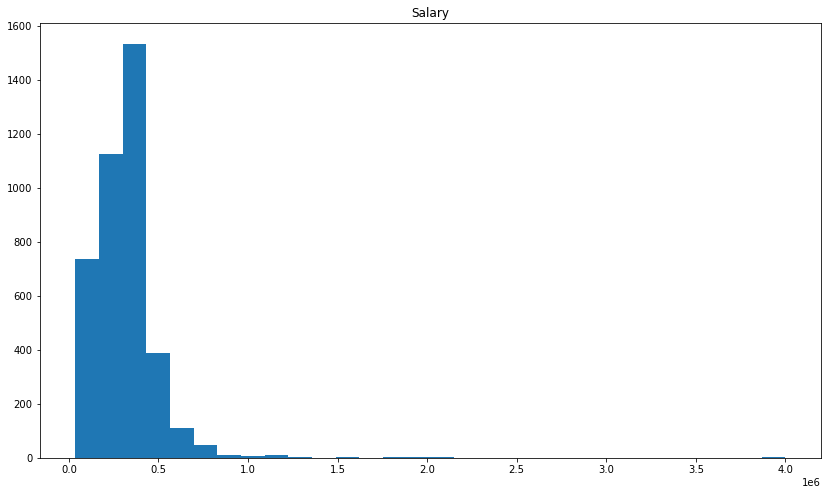

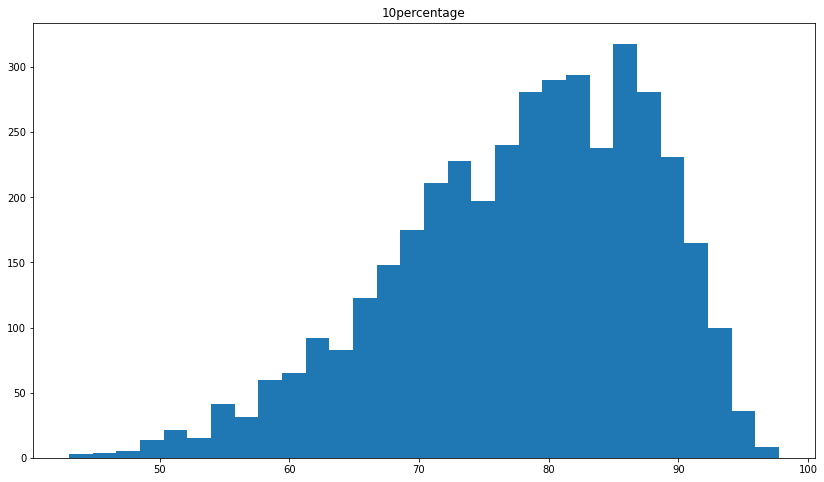

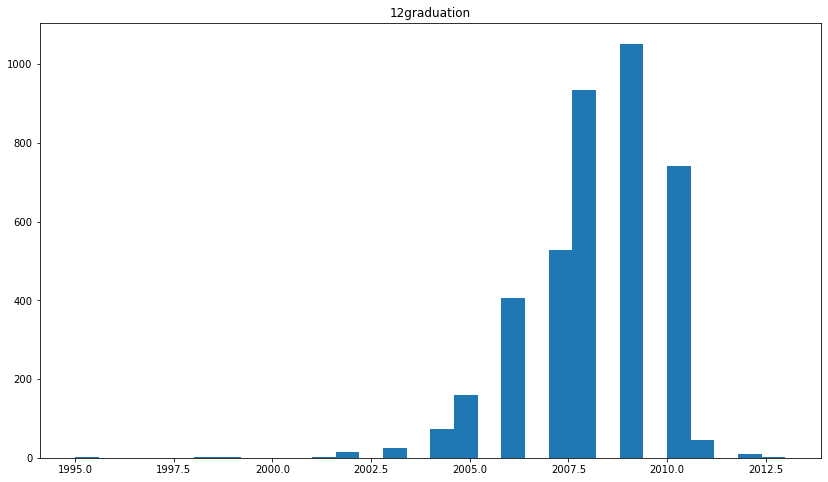

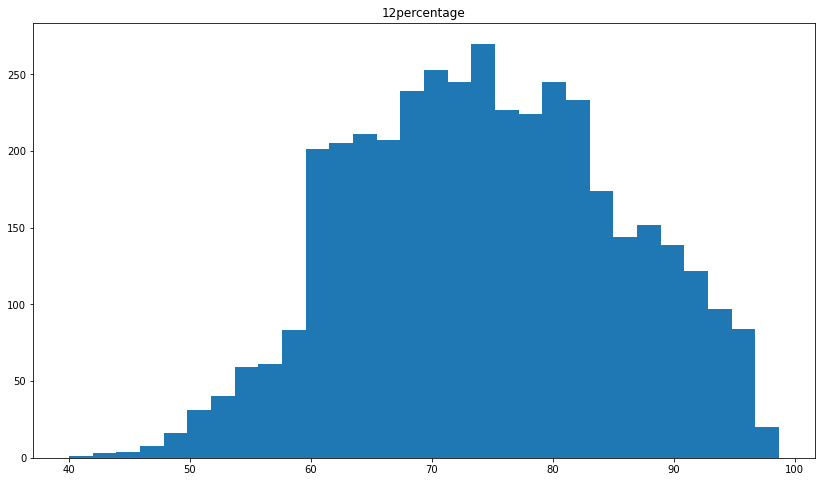

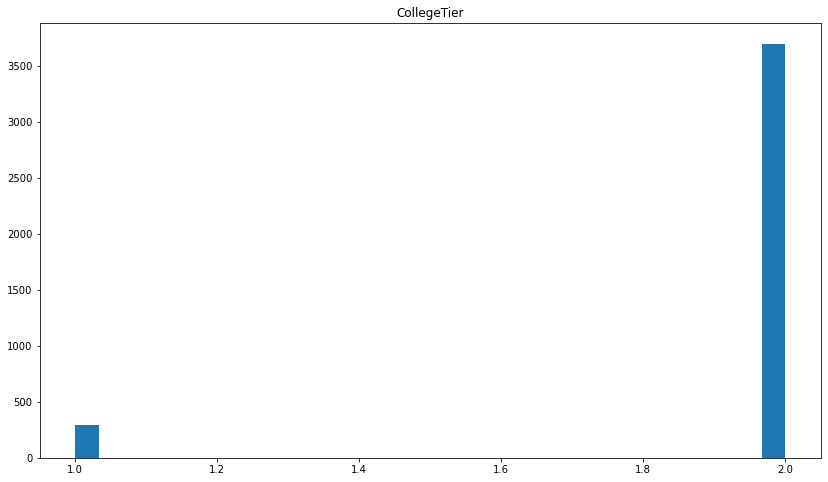

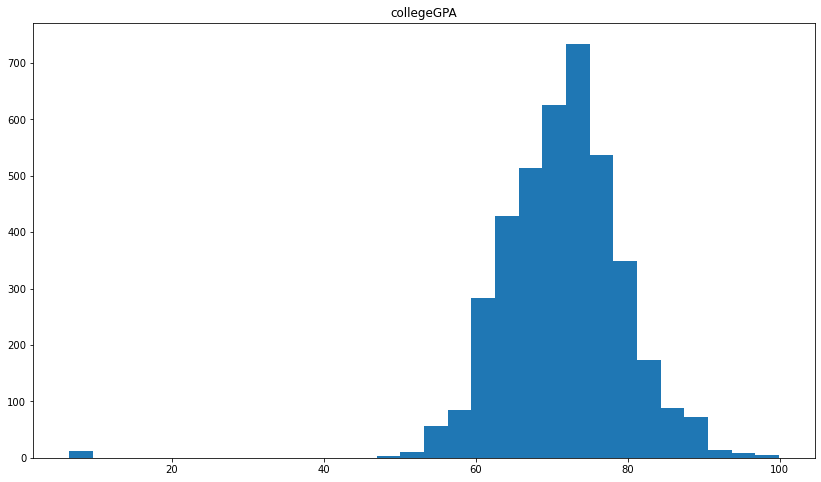

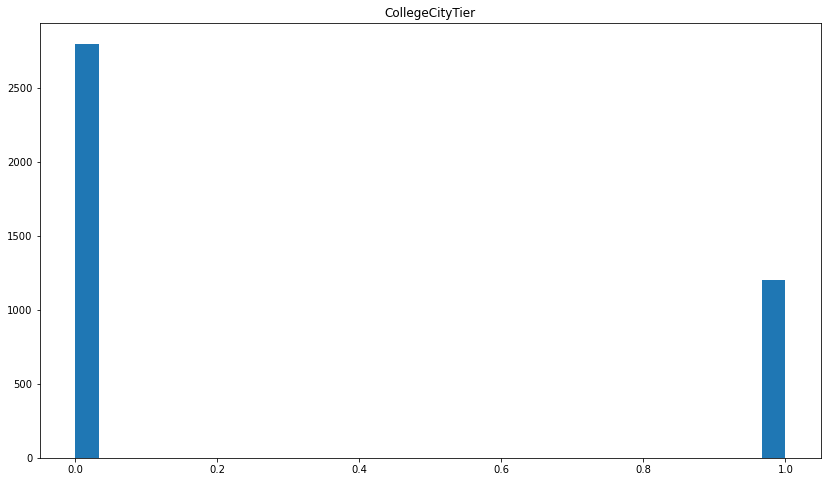

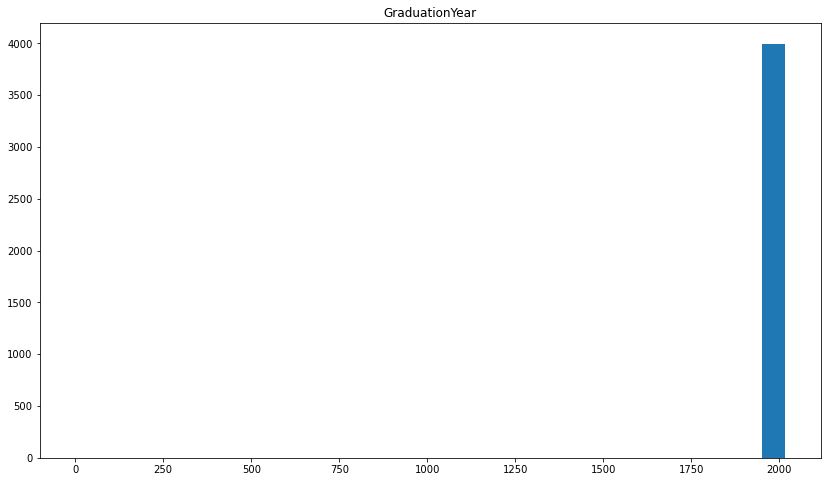

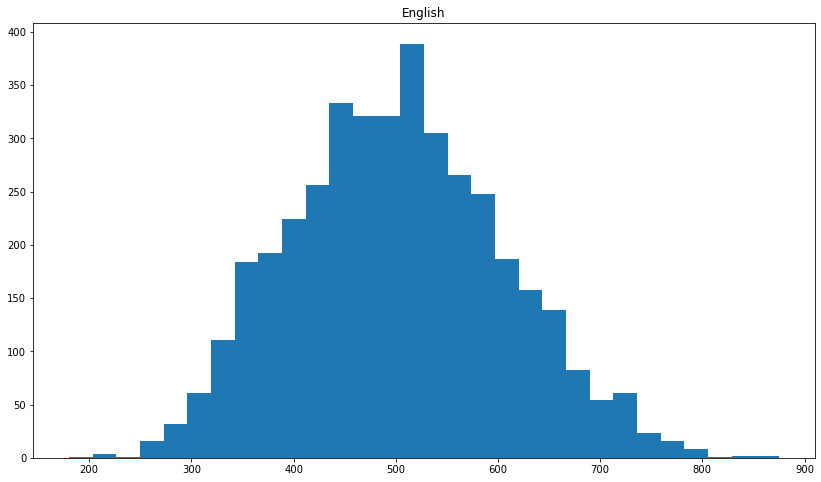

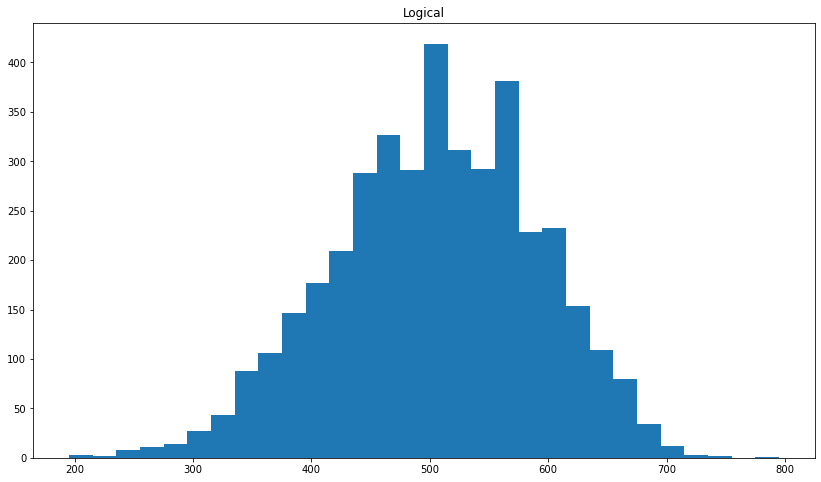

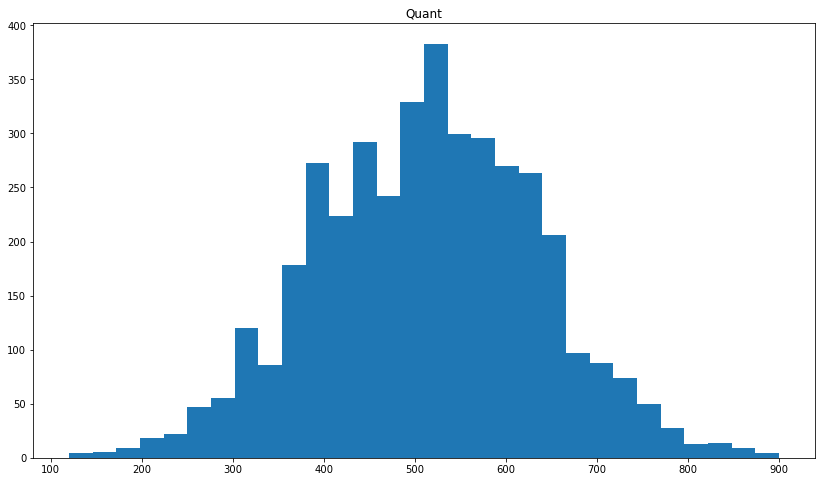

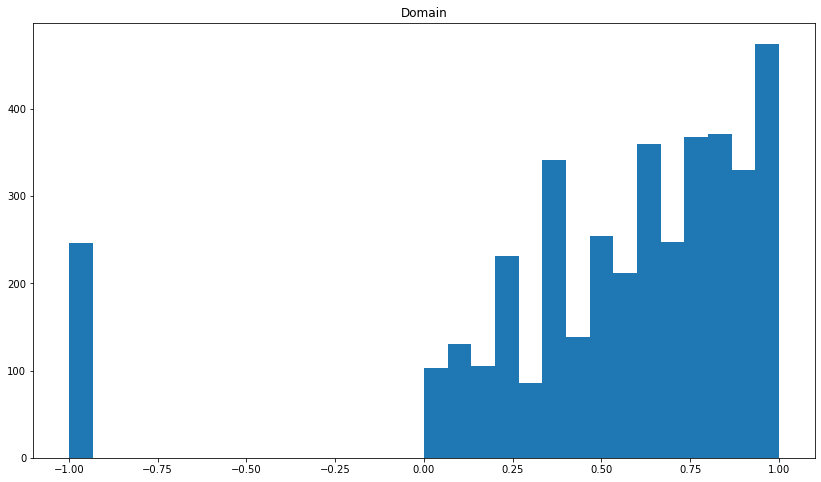

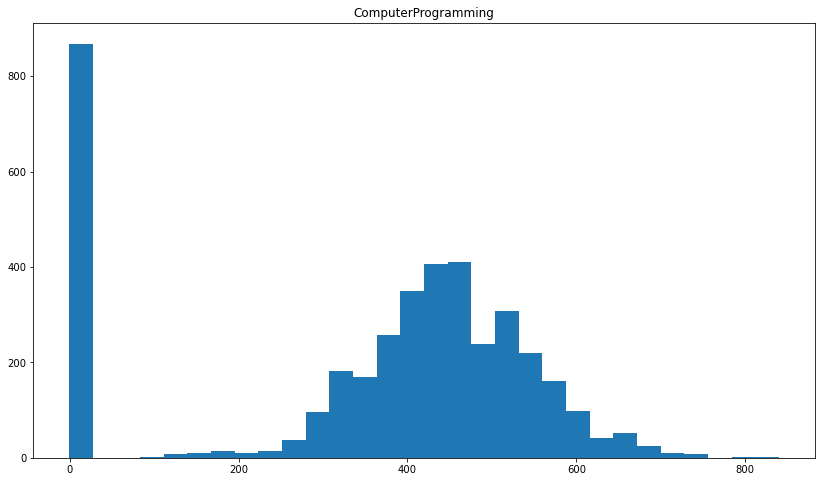

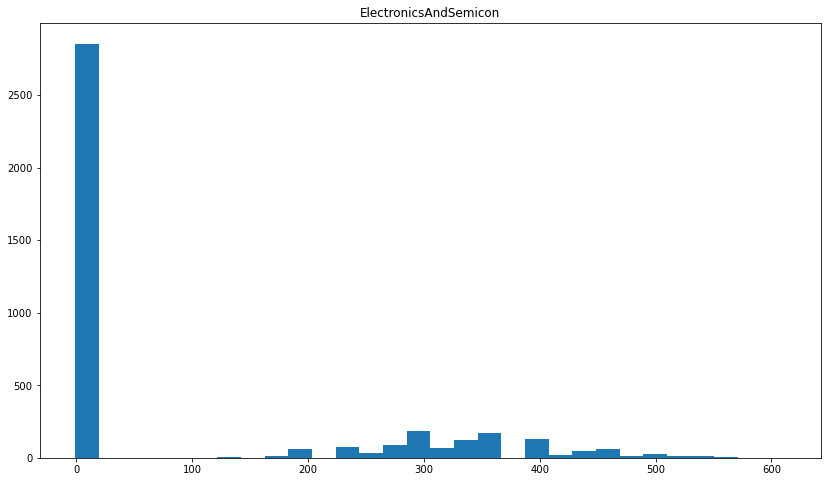

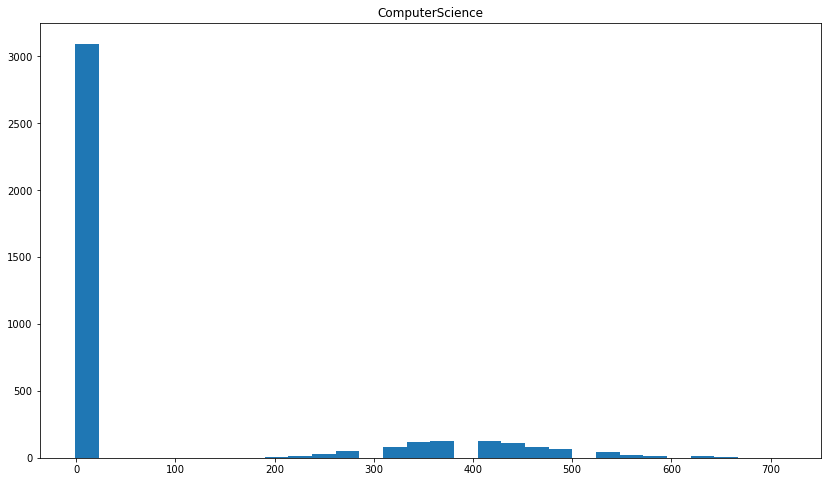

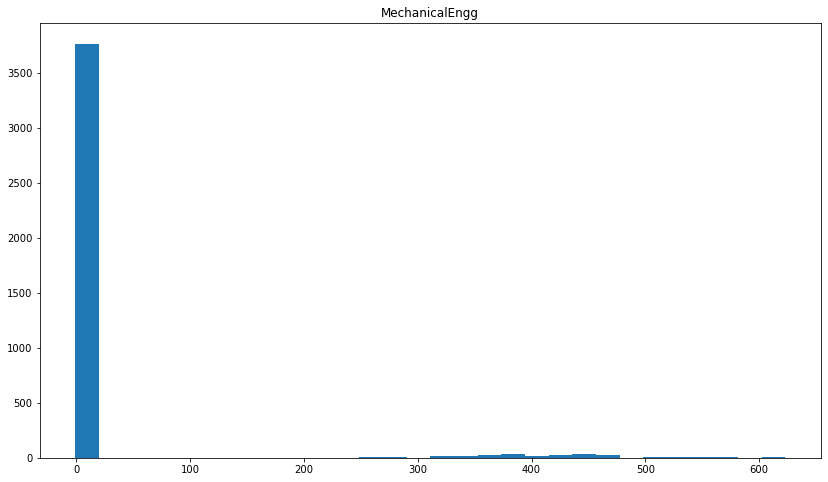

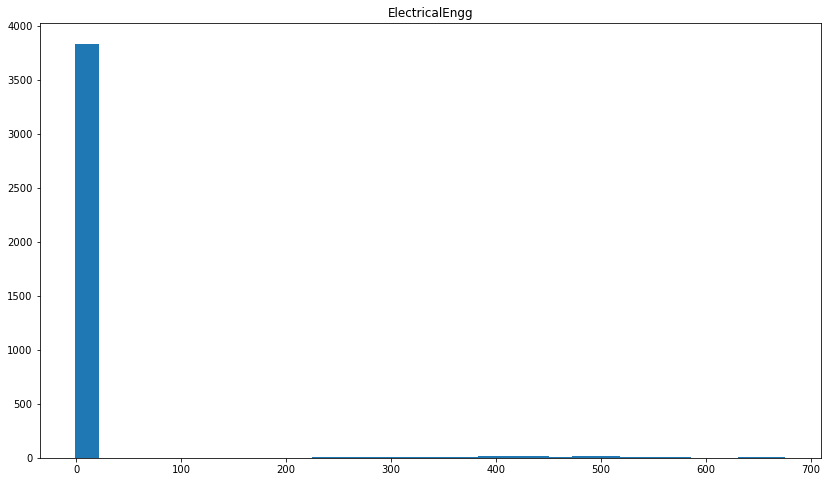

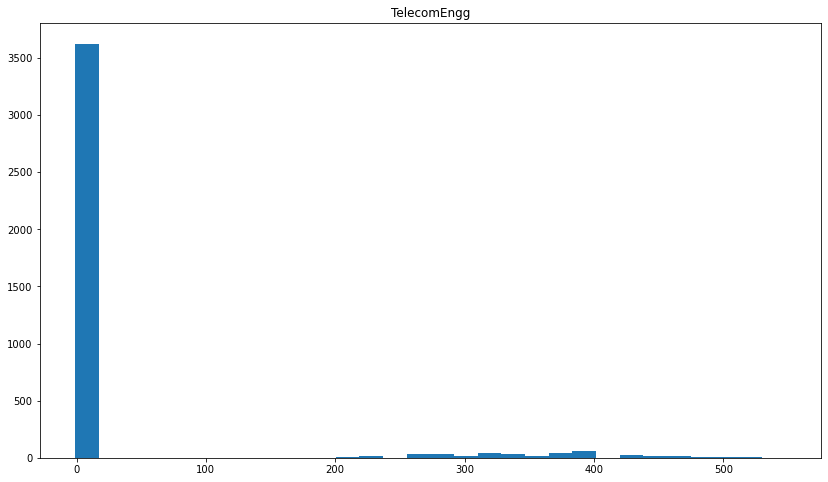

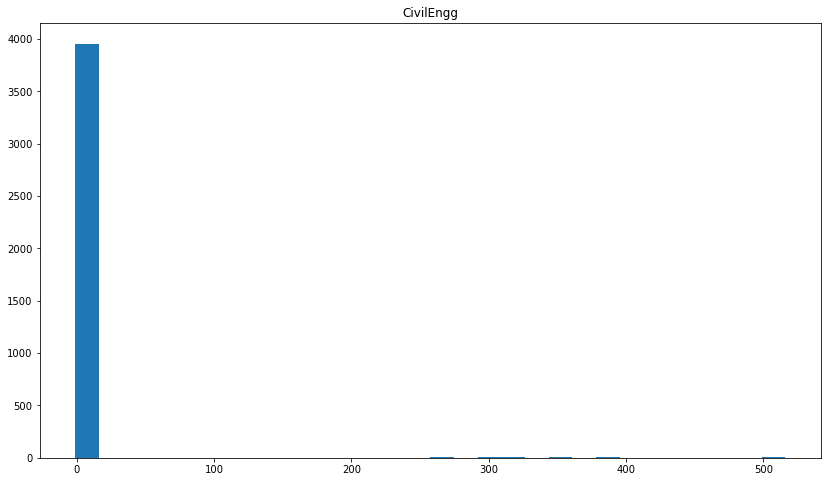

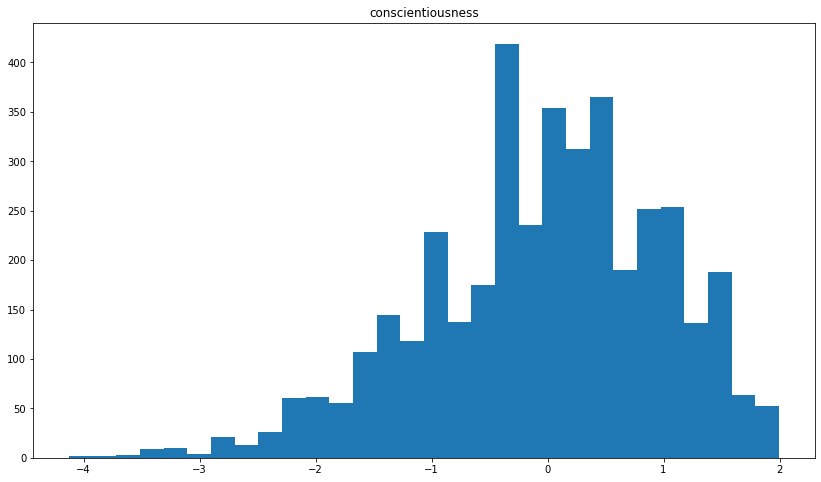

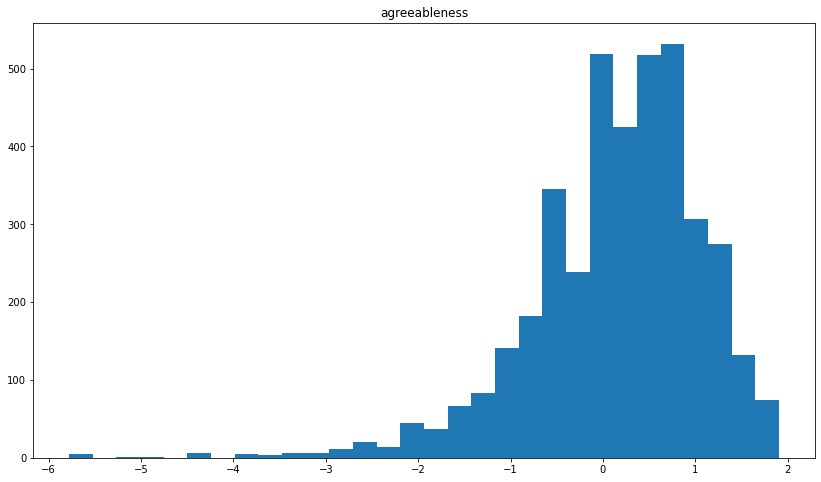

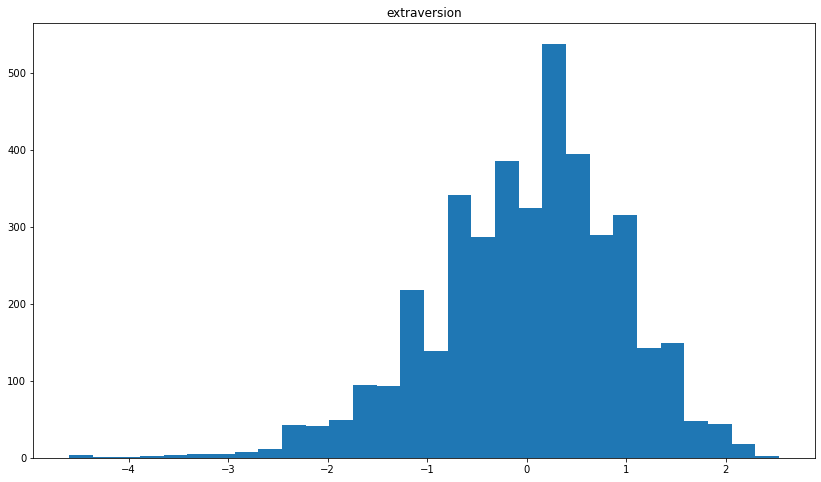

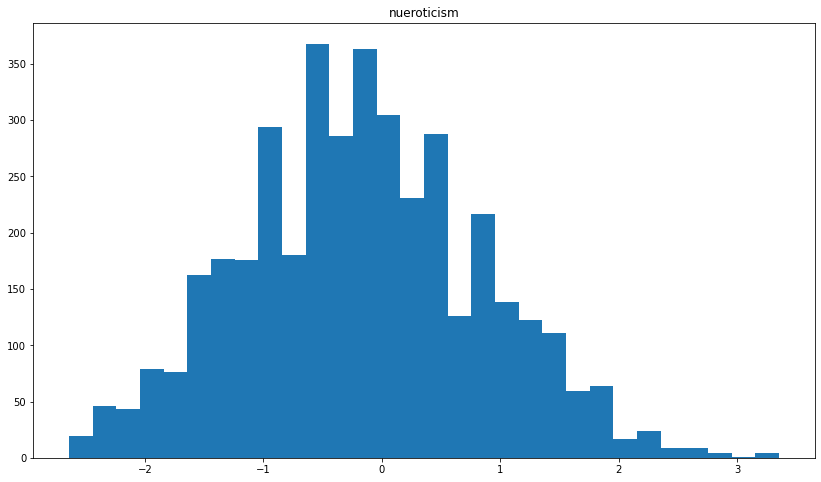

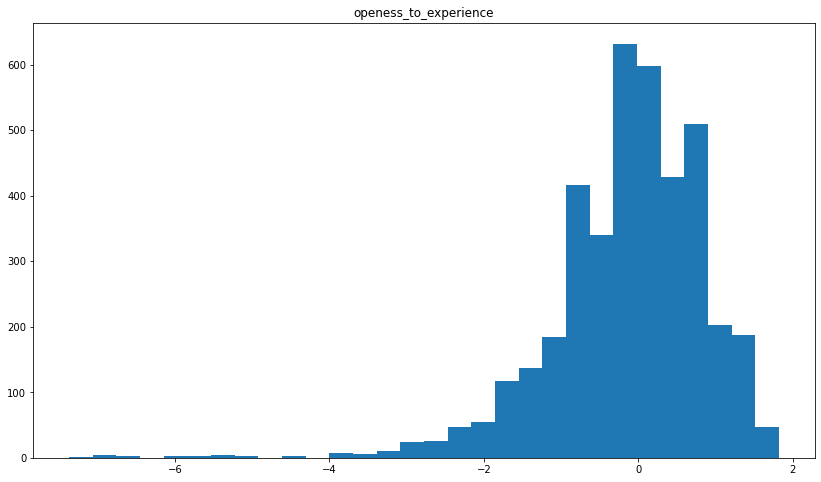

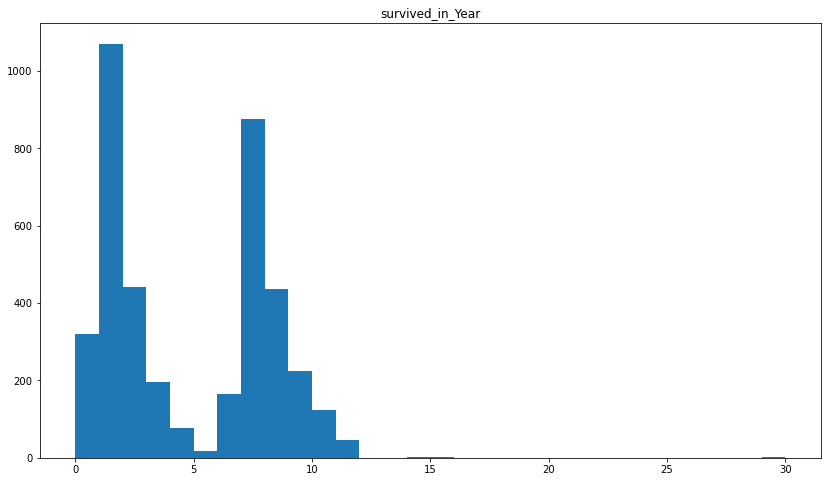

In [27]:
def plot_num_var(df):
    plot = df.select_dtypes(include=['int64','float64']).columns
    for i in plot:
        plt.figure(figsize=(14,8))
        plt.hist(df[i], bins=30)
        plt.title(i)
        plt.show()

plot_num_var(df)

In [28]:
df.select_dtypes(include=['object']).columns

Index(['Designation', 'JobCity', 'Gender', '10board', '12board', 'Degree',
       'Specialization', 'CollegeState'],
      dtype='object')

In [29]:
from pandas import Series
se = Series(['cbse','icse'])
df.loc[-df['12board'].isin(se),'12board'] = 'state board'

In [30]:

se = Series(['cbse','icse'])
df.loc[-df['10board'].isin(se),'10board'] = 'state board'

In [31]:
df.loc[df['Degree'] == "M.Sc. (Tech.)", 'Degree'] = "M.Tech./M.E."

In [32]:

Specialization = []
CSE = [ 'computer science & engineering','computer application','electronics and computer engineering','computer engineering','computer science','computer and communication engineering', 'computer science and technology']
IT = [ 'information technology', 'information science engineering','information & communication technology', 'information science']
Entc = [ 'electronics and communication engineering','electronics & telecommunications','telecommunication engineering']
Mech = ['mechanical engineering','mechanical and automation','mechatronics','mechanical & production engineering']
elect = ['applied electronics and instrumentation','electronics & instrumentation eng','electronics','electronics engineering', 'electronics and instrumentation engineering']
BE = ['biomedical engineering','biotechnology']
IndE = [ 'industrial & management engineering', 'industrial engineering','industrial & production engineering']
inst = [ 'instrumentation and control engineering', 'instrumentation engineering']
power = ['power systems and automation','polymer technology','embedded systems technology', 'control and instrumentation engineering']
electric =['electronics and electrical engineering','electrical engineering','electrical and power engineering']
other = ['internal combustion engine','chemical engineering','ceramic engineering','other','aeronautical engineering','metallurgical engineering','civil engineering','automobile/automotive engineering']

In [33]:
for i in df['Specialization']:
    if i in CSE:
        Specialization.append("CSE")
    elif i in IT:
        Specialization.append("IT")
    elif i in Entc:
        Specialization.append("ENTC")
    elif i in Mech:
        Specialization.append("Mech")
    elif i in elect:
        Specialization.append("Electronics")
    elif i in BE:
        Specialization.append("Bio Eng")
    elif i in IndE:
        Specialization.append("Ind Eng")
    elif i in inst:
        Specialization.append("Instrumentation")
    elif i in power:
        Specialization.append("Power")
    elif i in electric:
        Specialization.append("Electric")
    elif i in other:
        Specialization.append("Other")
    else:
        Specialization.append("Other")


In [34]:
df['Specialization'] = Specialization

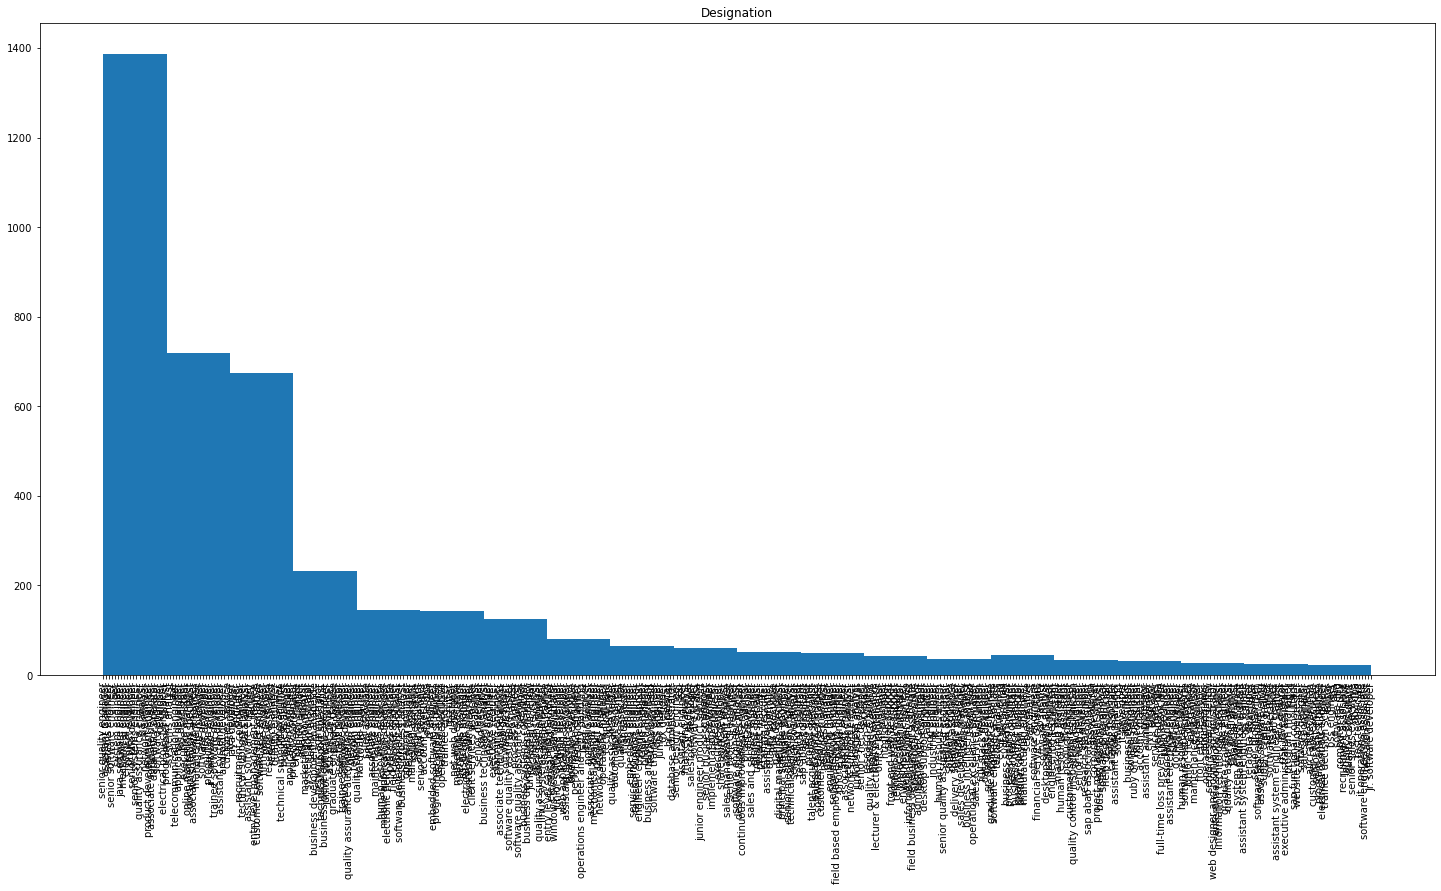

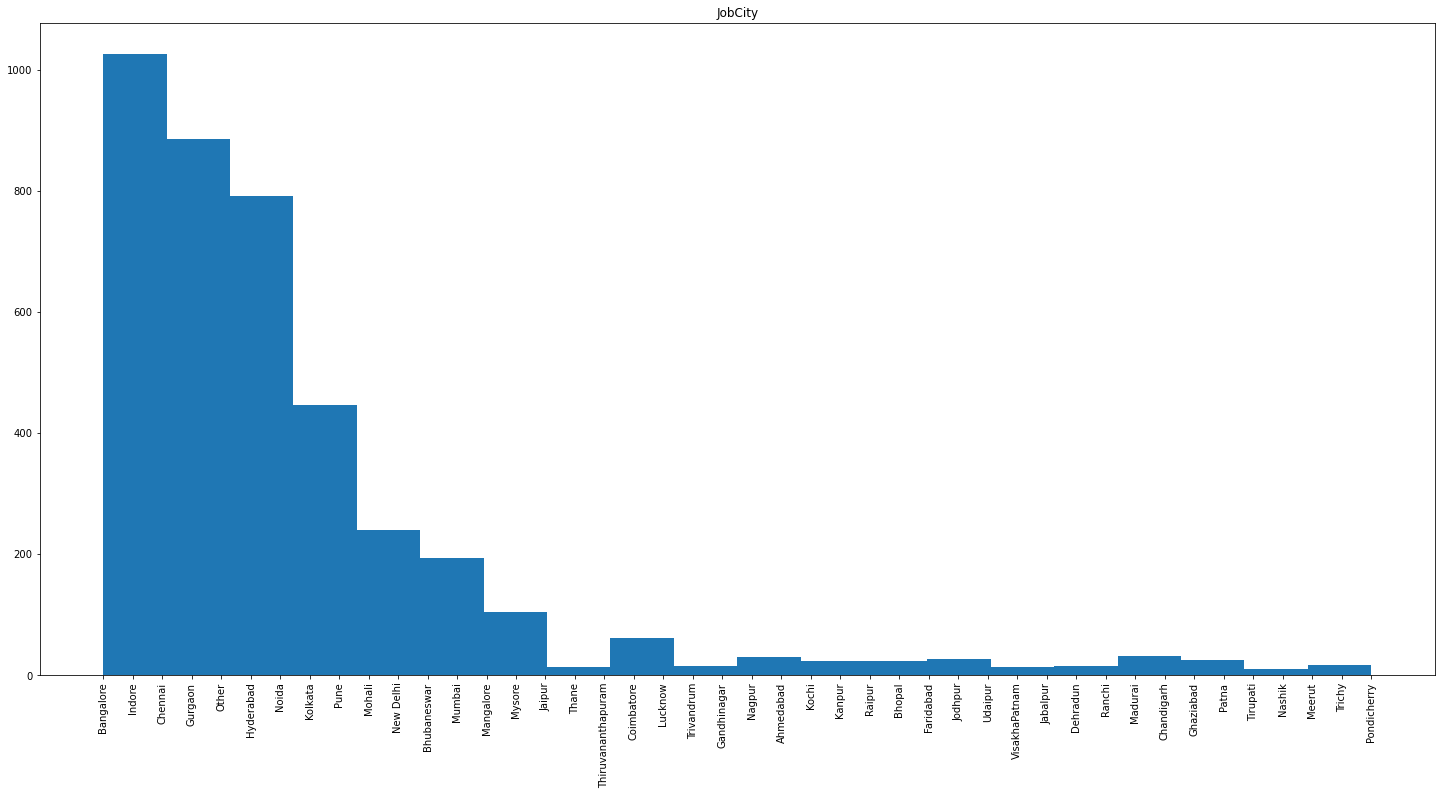

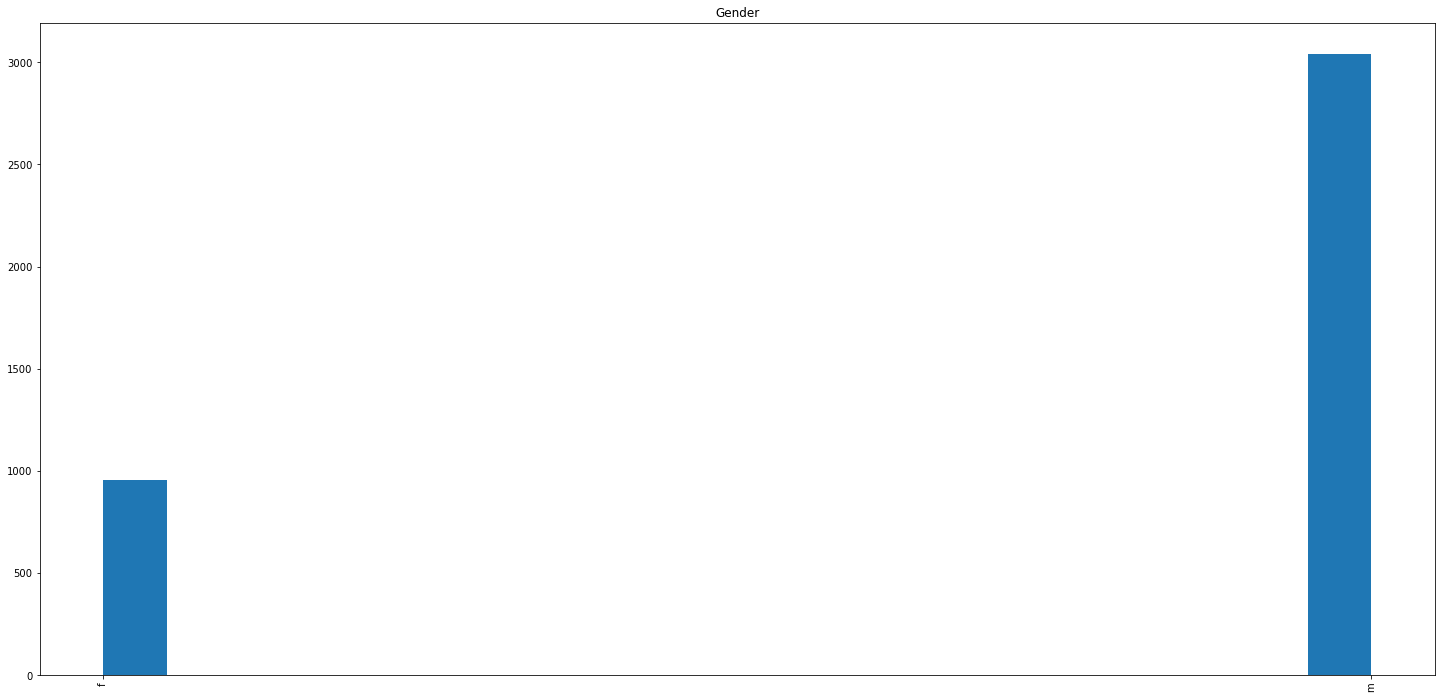

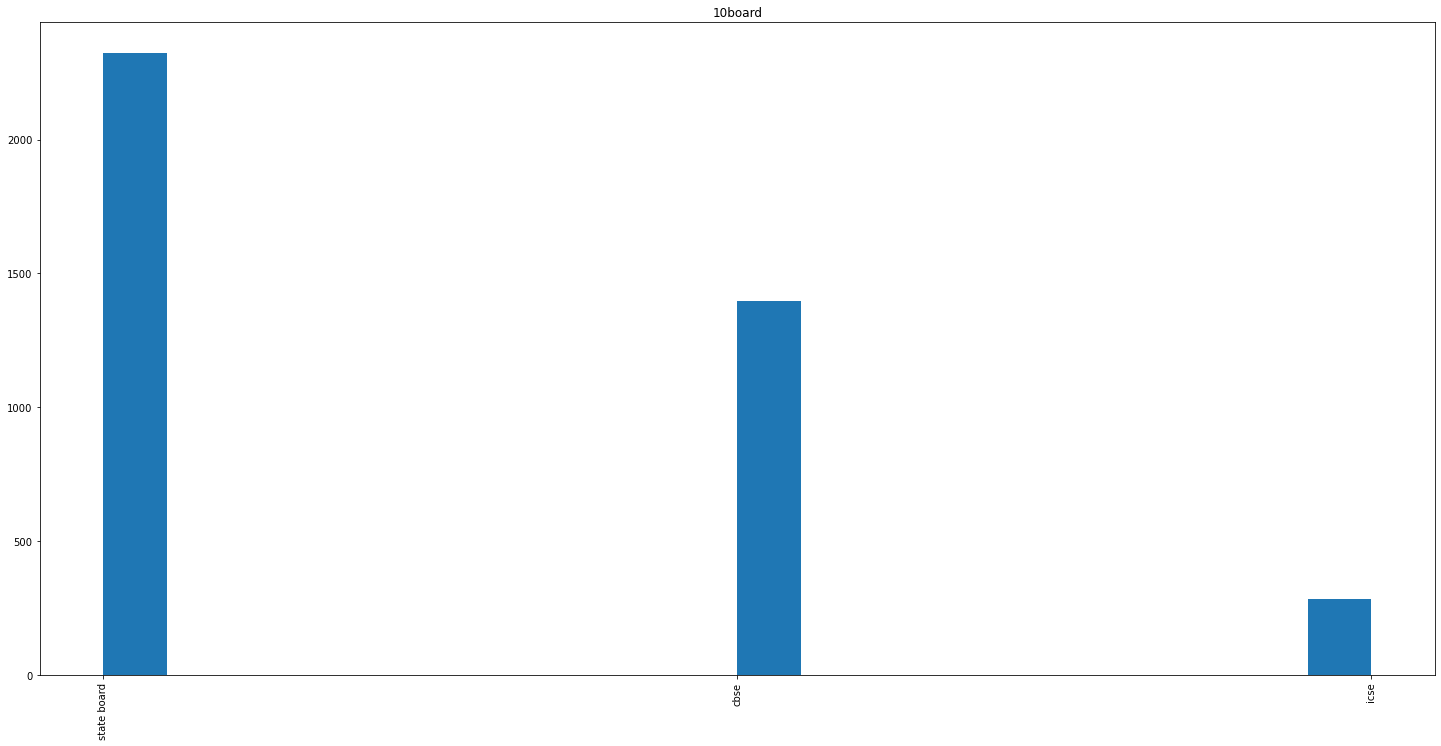

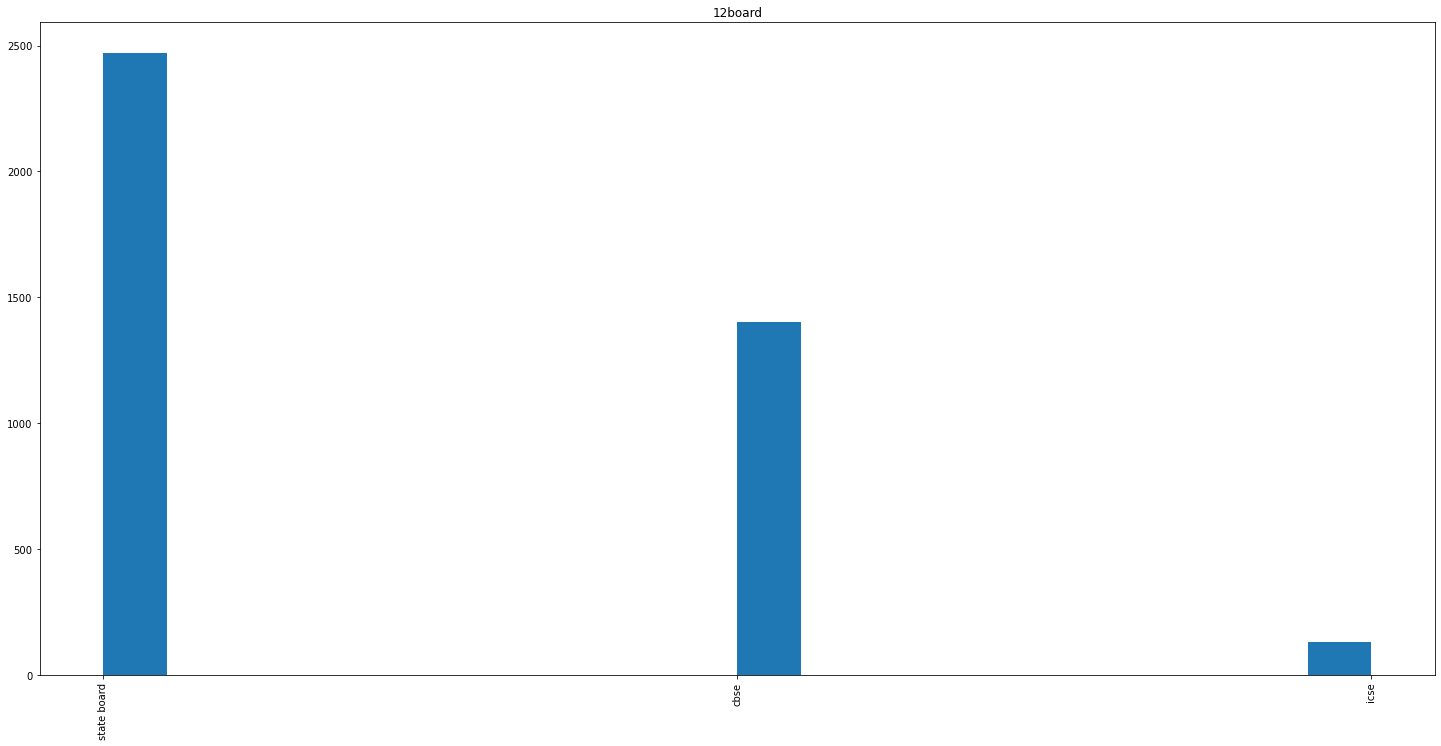

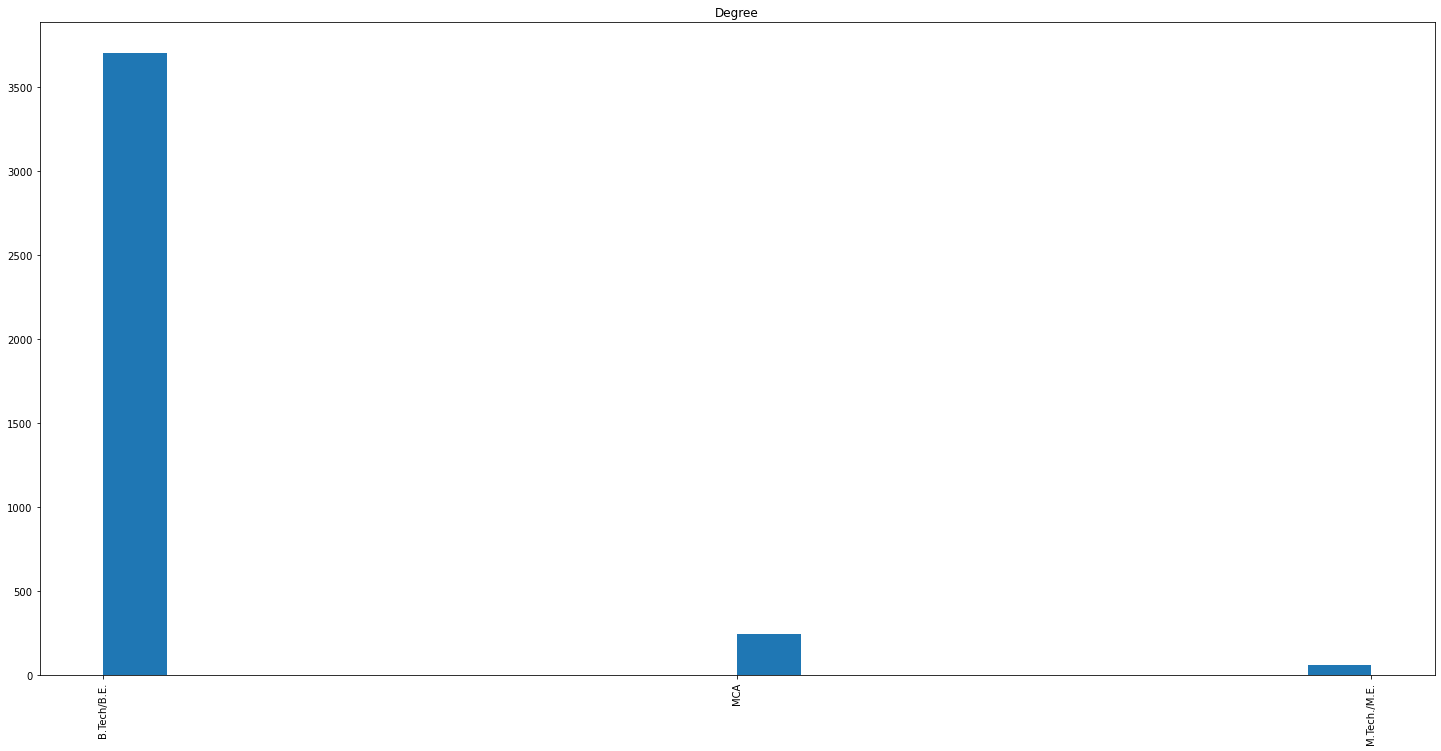

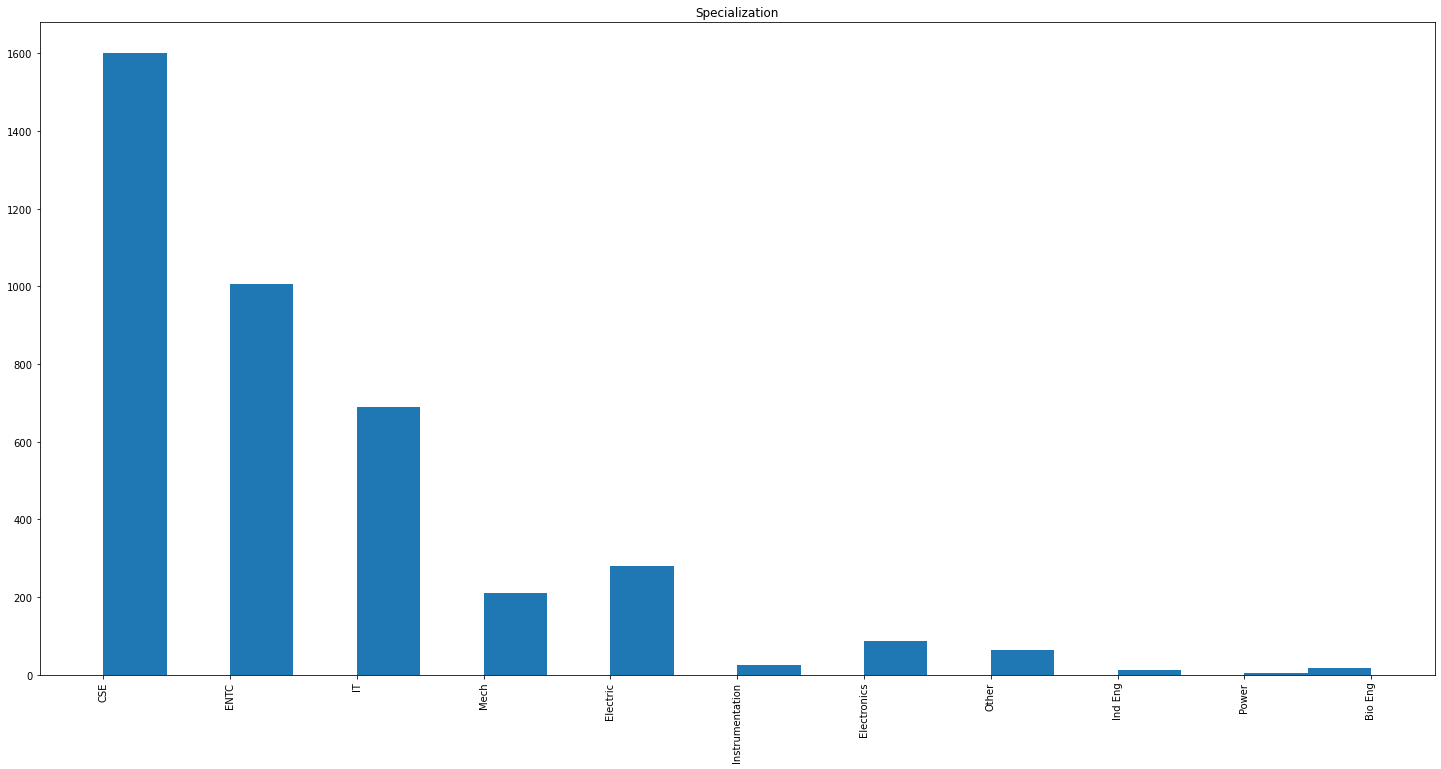

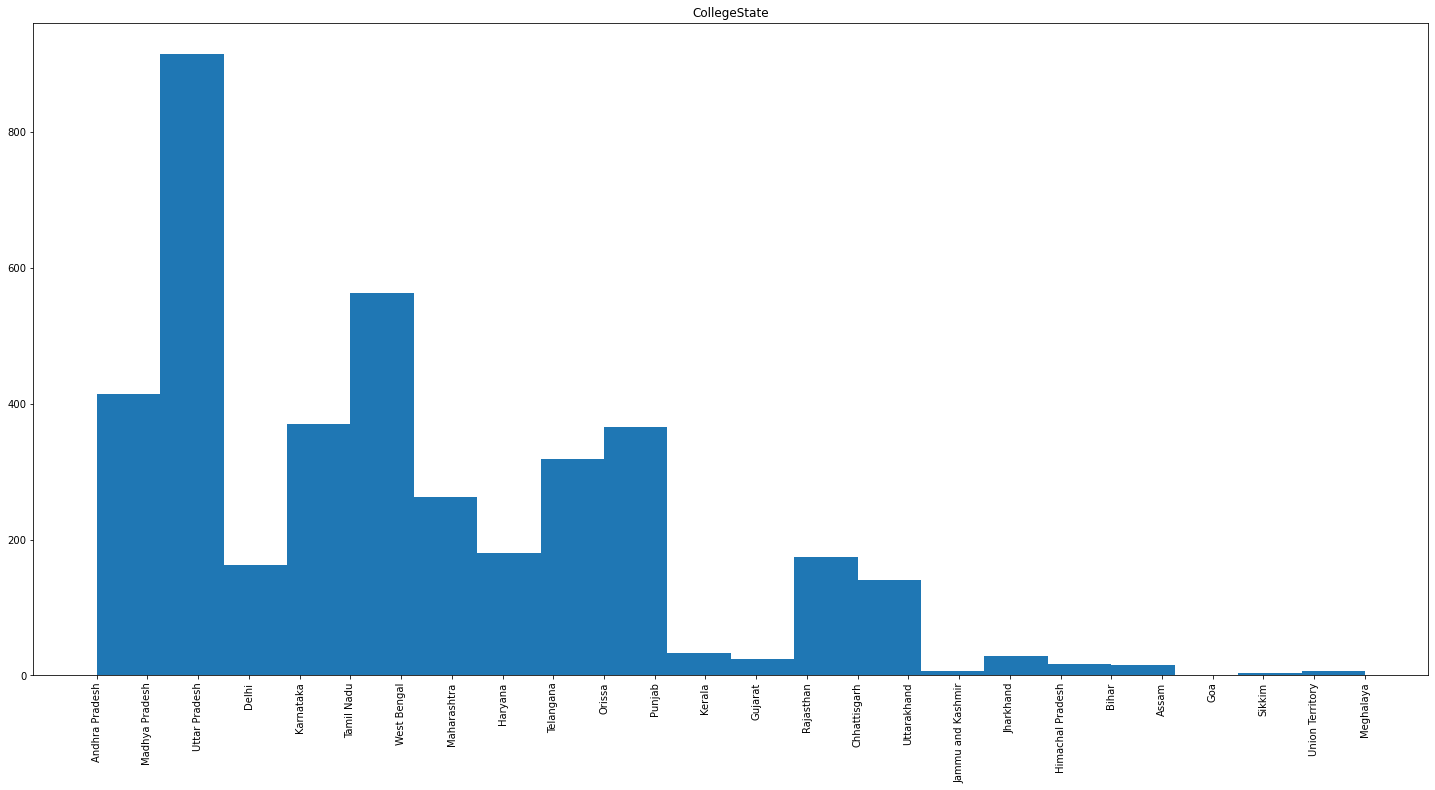

In [35]:
def plot_cat_var(df):
    plot = df.select_dtypes(include=['object']).columns
    for i in plot:
        plt.figure(figsize=(25,12))
        plt.xticks(rotation=90)
        plt.hist(df[i], bins=20)
        plt.title(i)
        plt.show()
plot_cat_var(df)

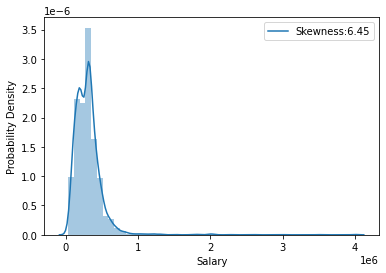

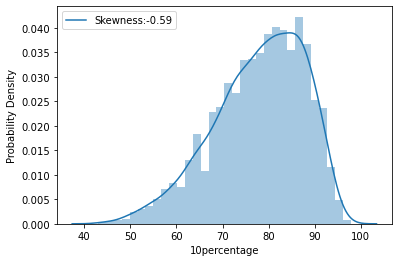

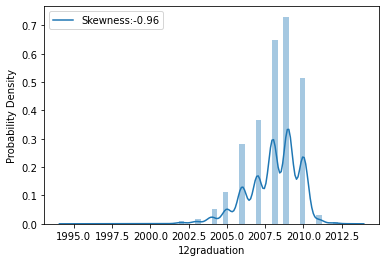

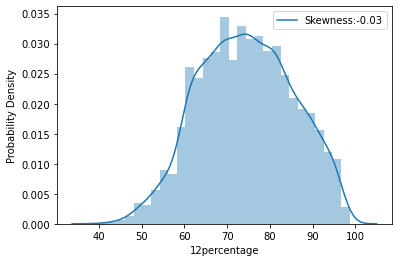

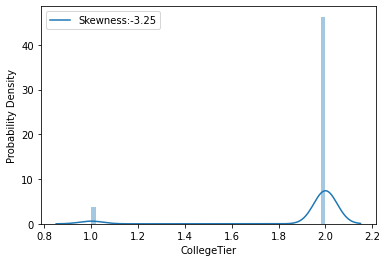

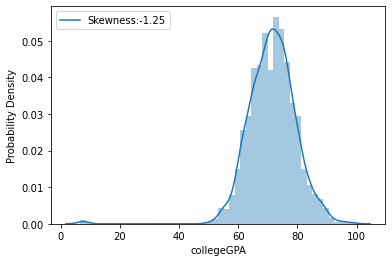

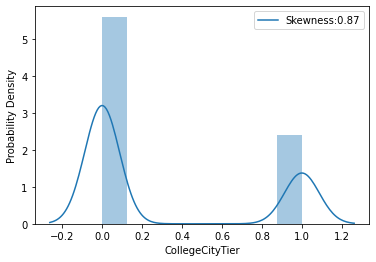

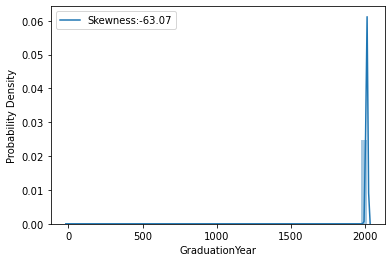

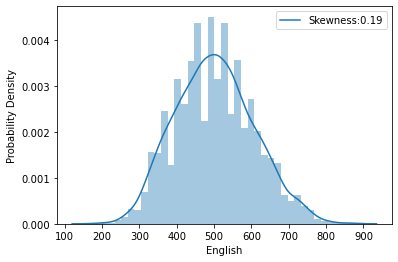

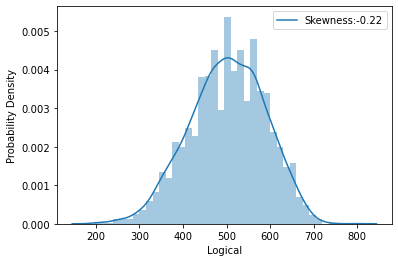

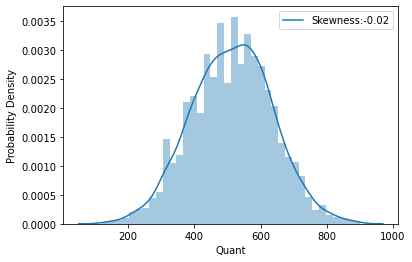

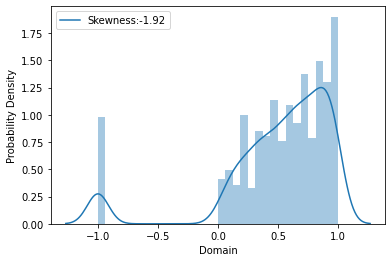

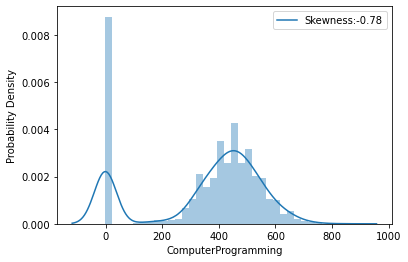

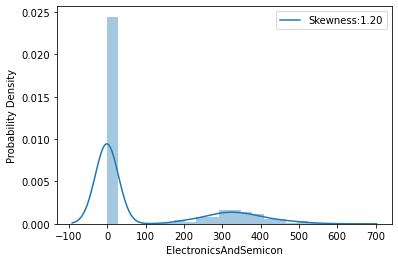

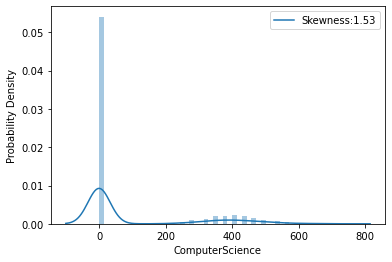

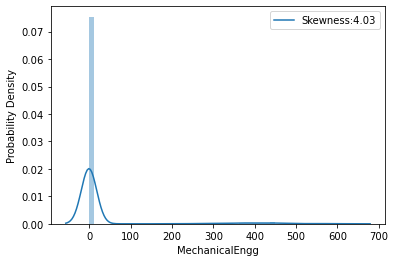

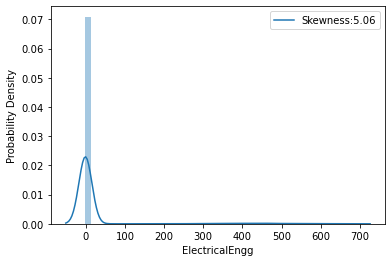

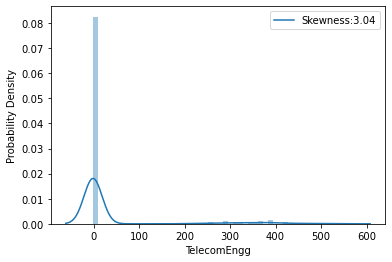

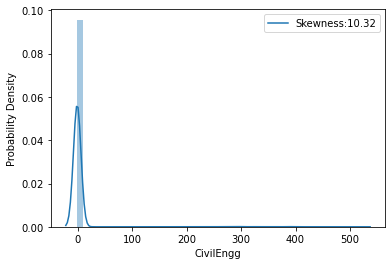

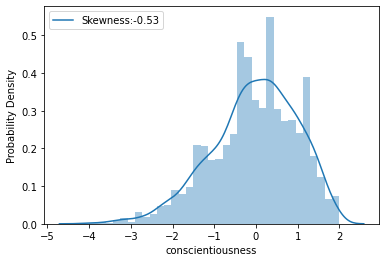

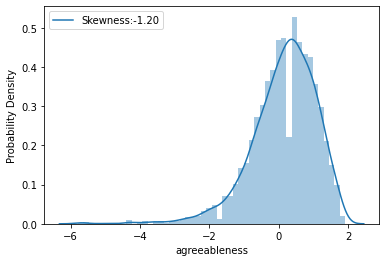

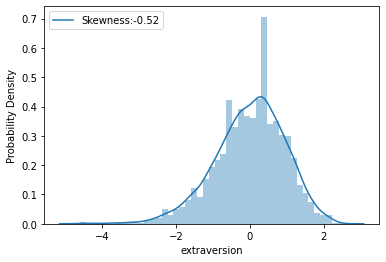

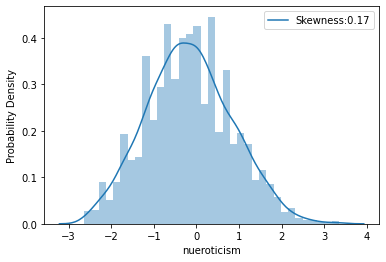

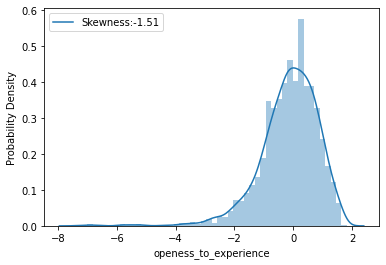

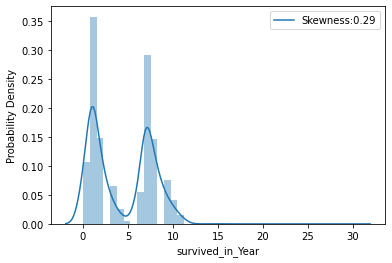

In [36]:
for col in numeric_cols:
    bar = sns.distplot(df[col], label=col)
    bar.legend(['Skewness:{:0.2f}'.format(df[col].skew())])
    plt.ylabel('Probability Density')
    plt.xlabel(col)
    plt.show()

In [37]:
data = df.select_dtypes(include=['int64','float64']).columns
data

Index(['Salary', '10percentage', '12graduation', '12percentage', 'CollegeTier',
       'collegeGPA', 'CollegeCityTier', 'GraduationYear', 'English', 'Logical',
       'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'survived_in_Year'],
      dtype='object')

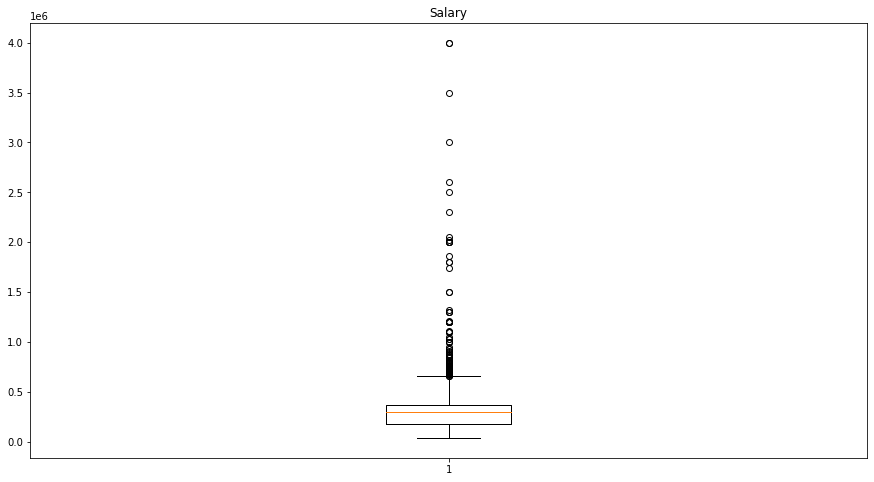

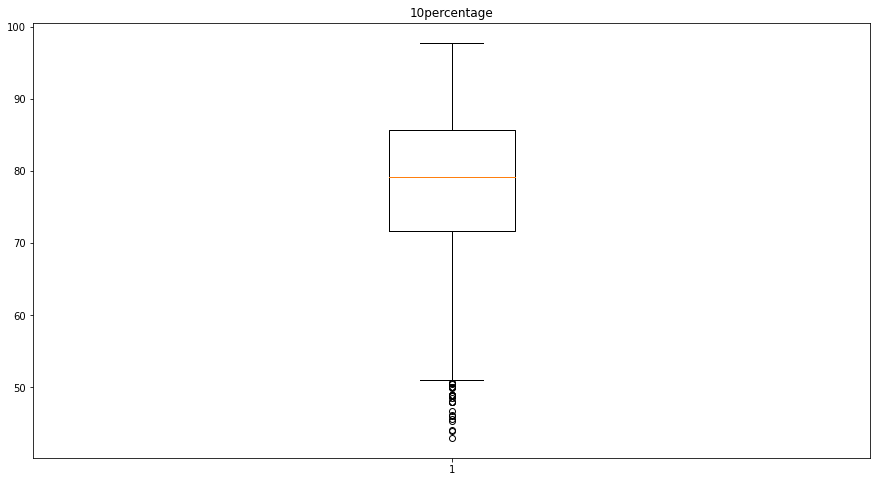

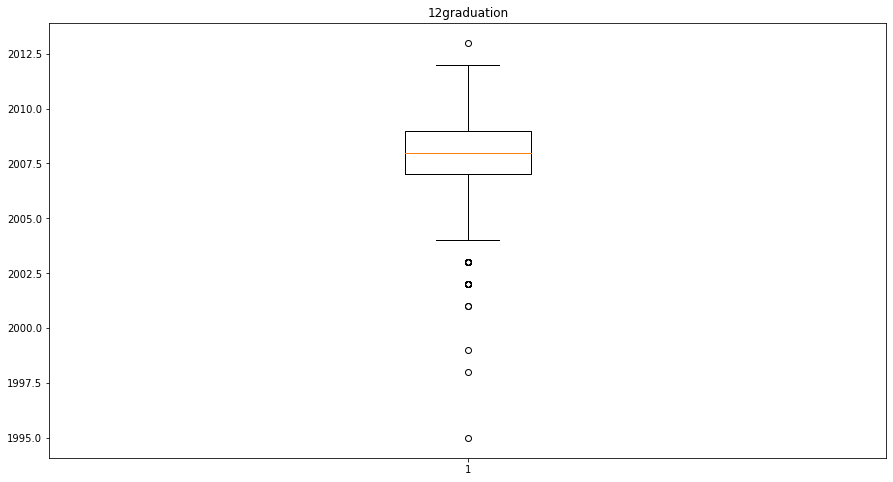

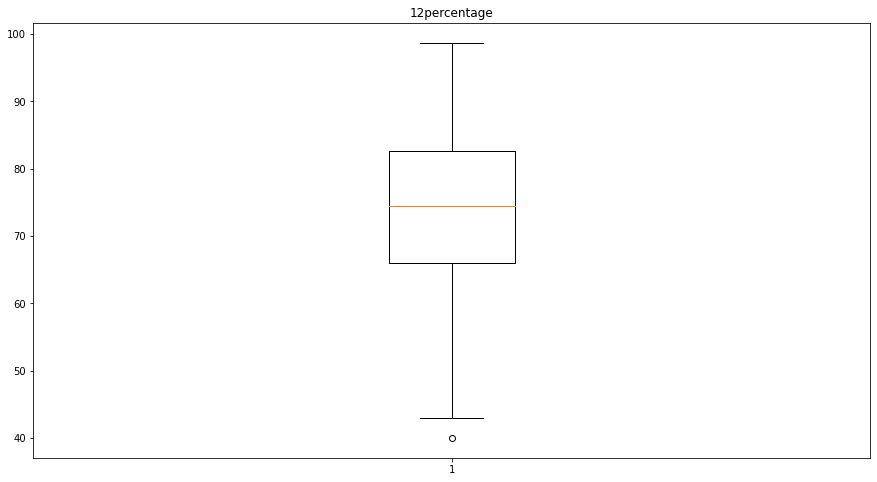

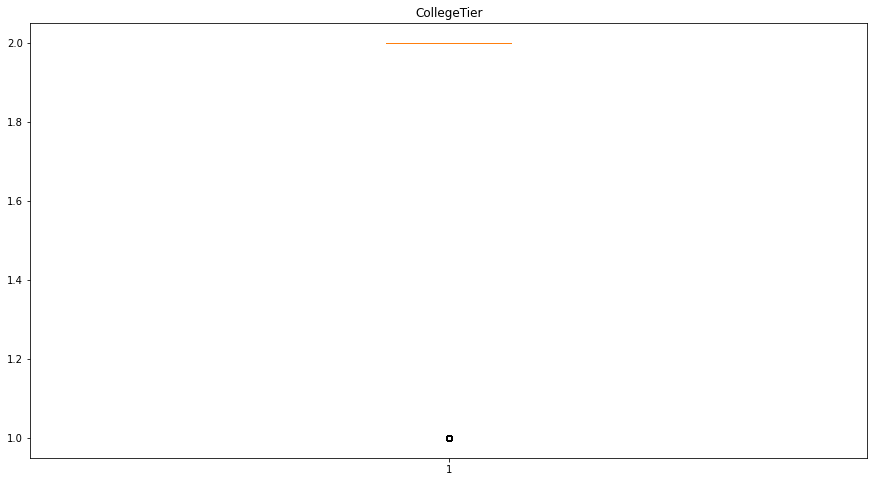

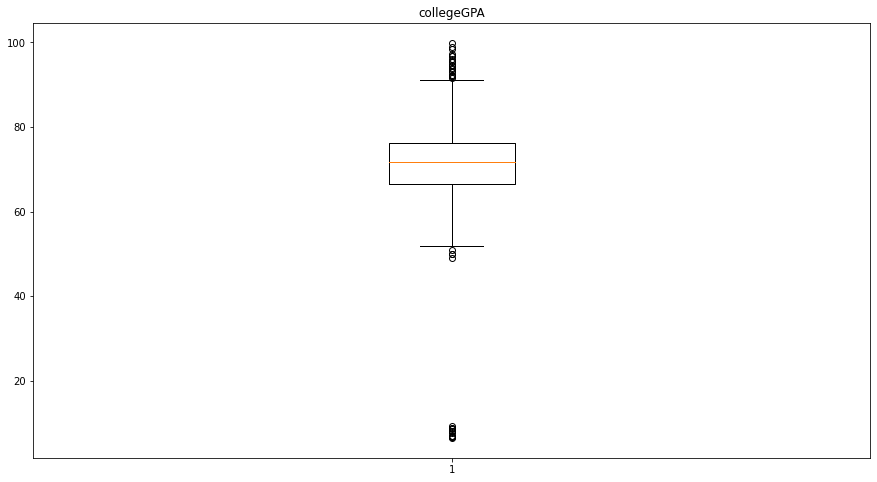

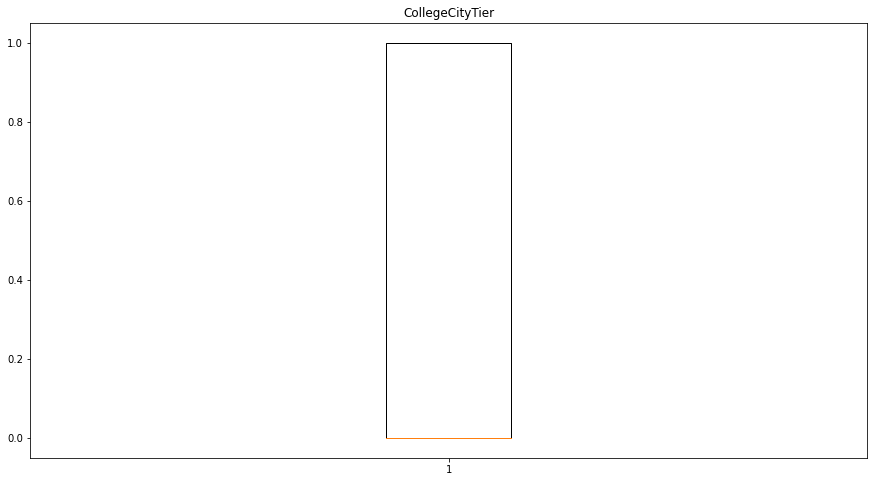

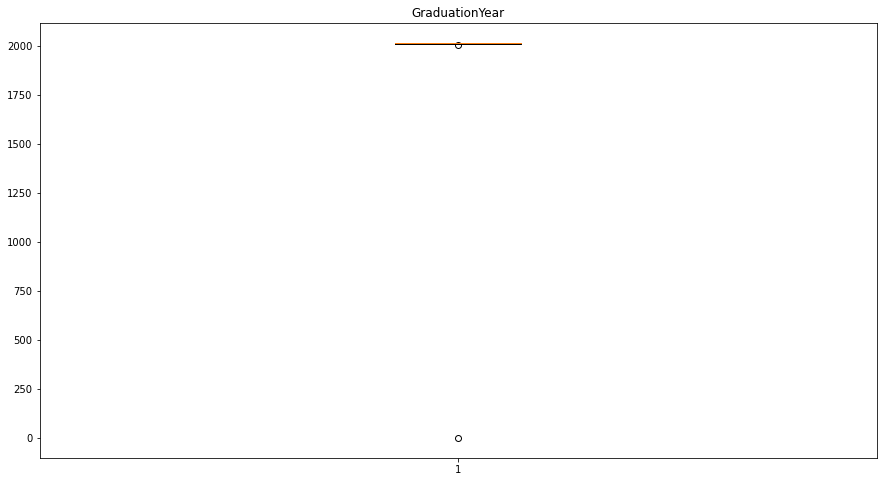

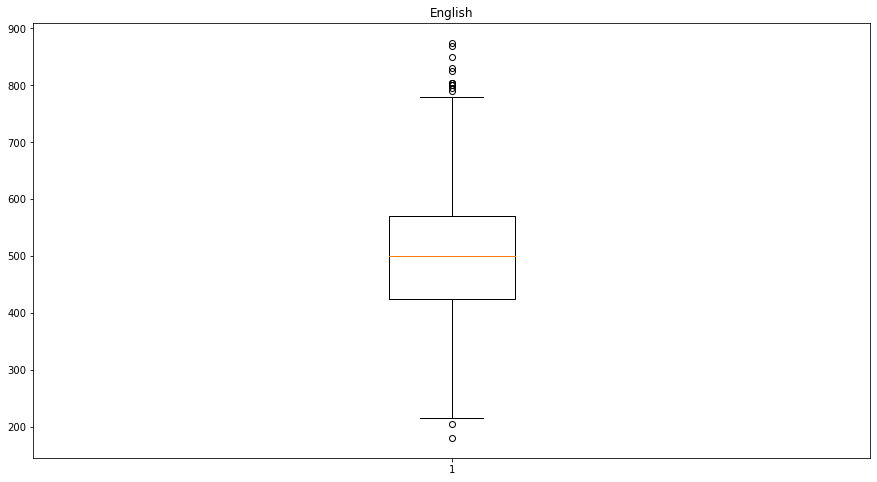

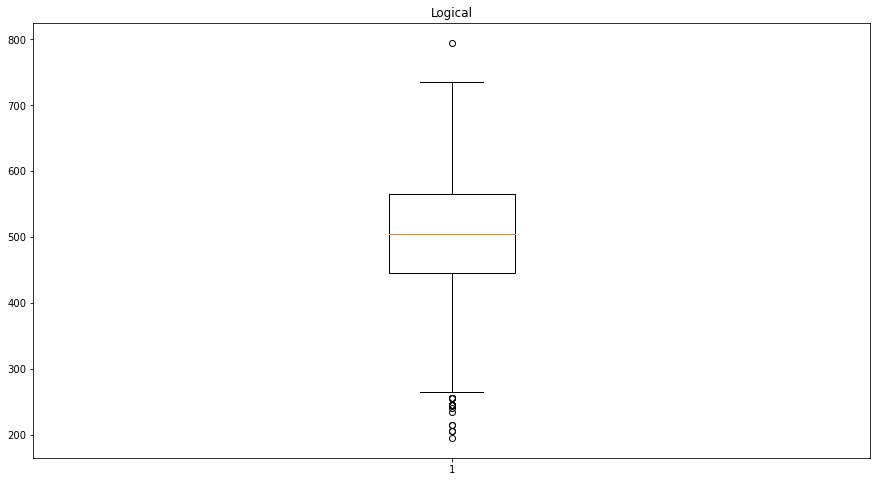

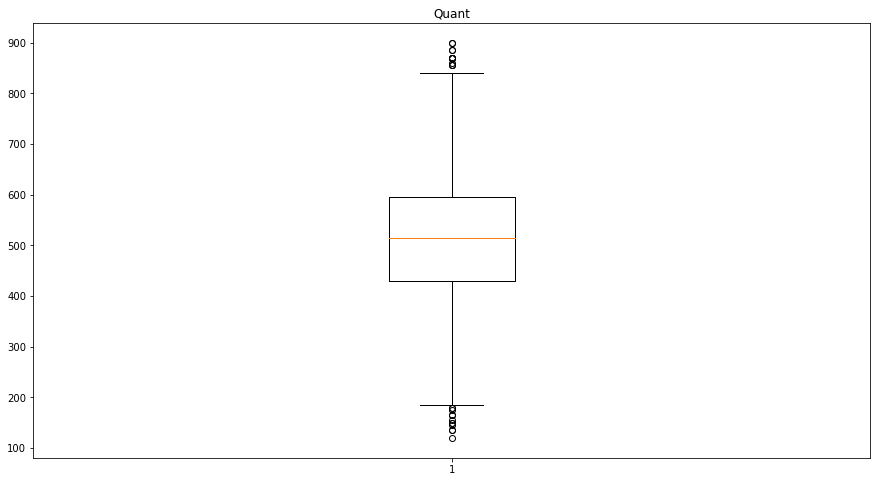

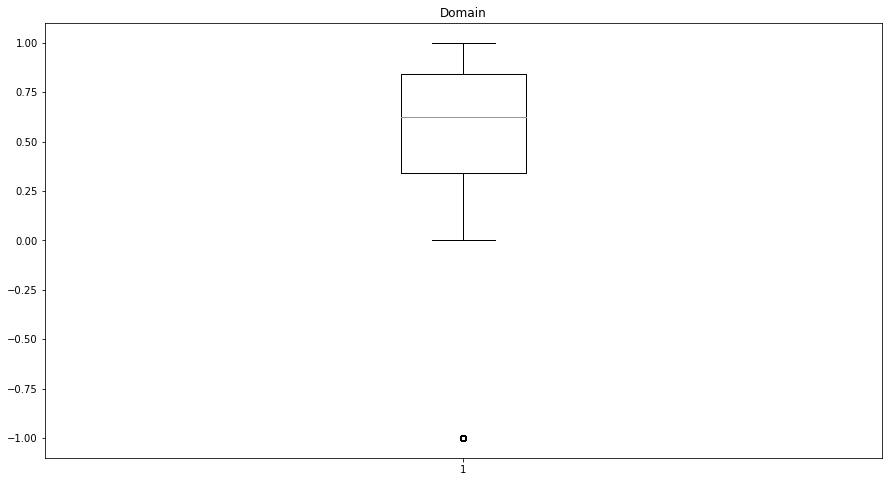

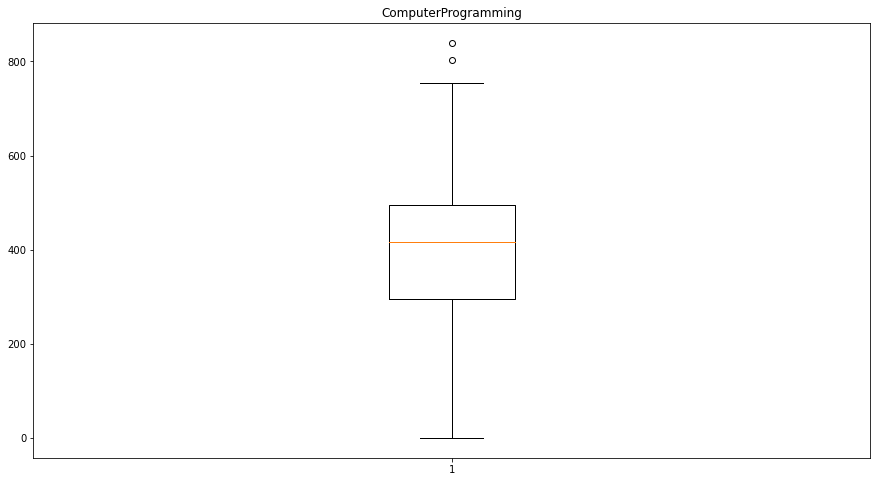

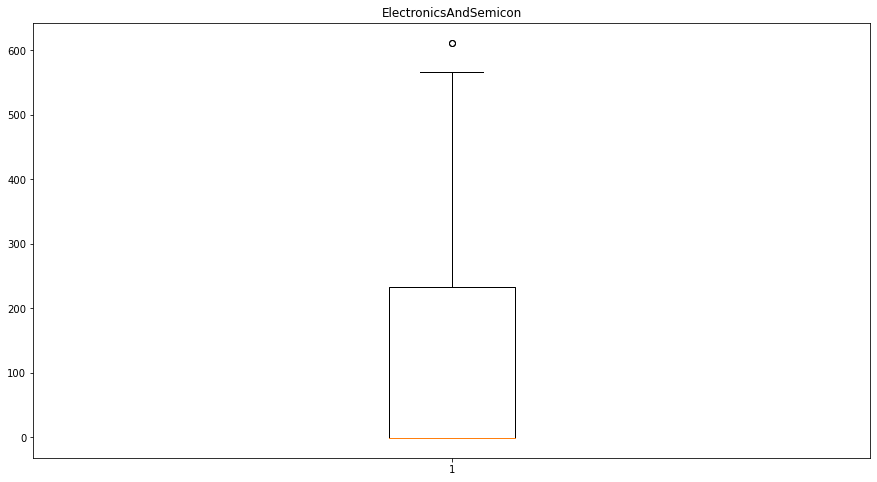

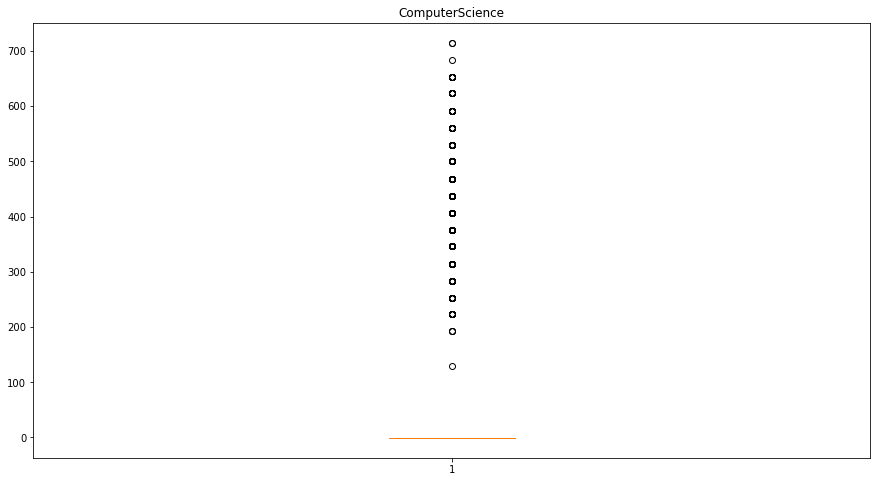

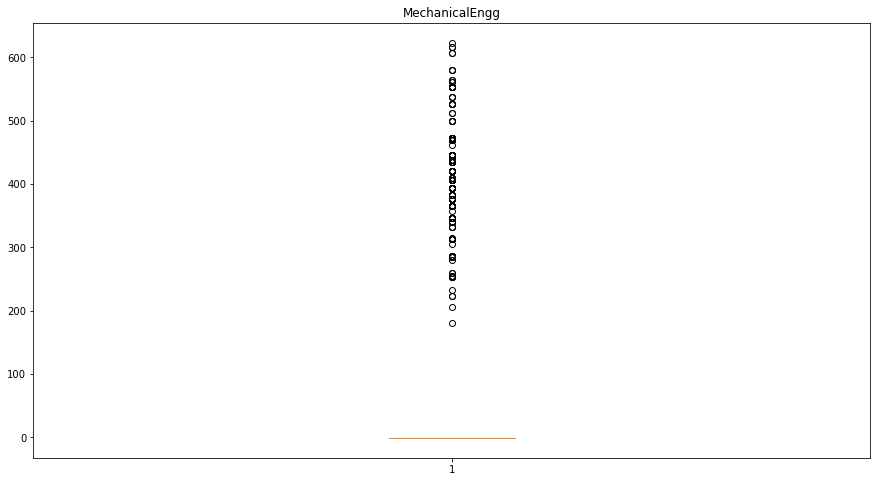

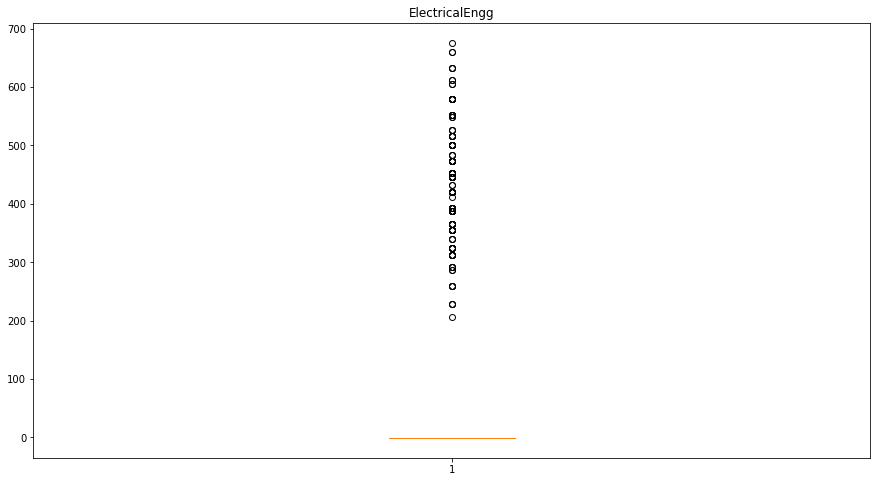

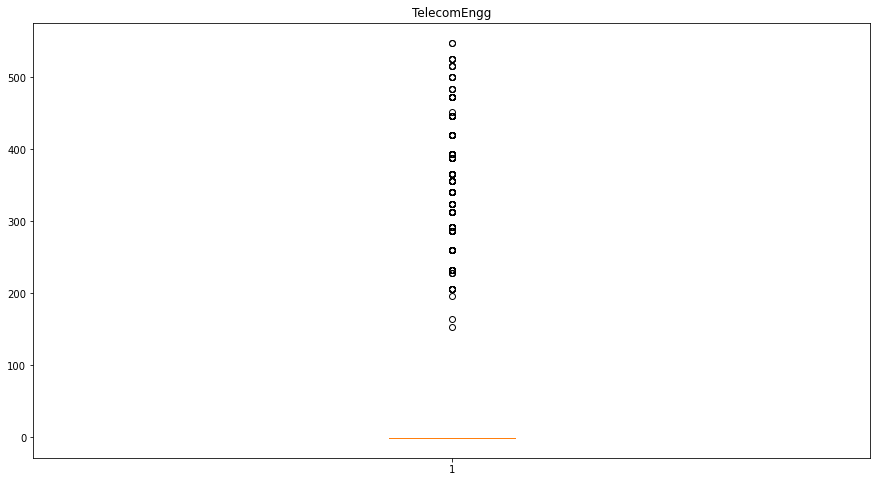

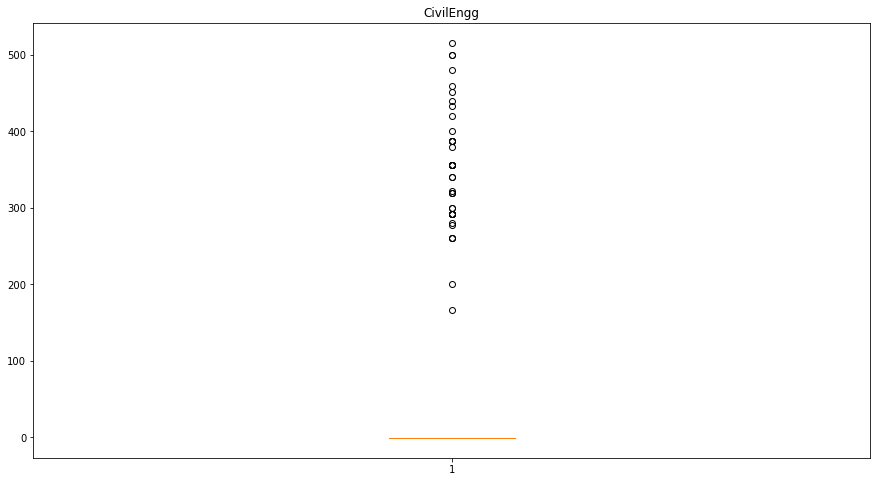

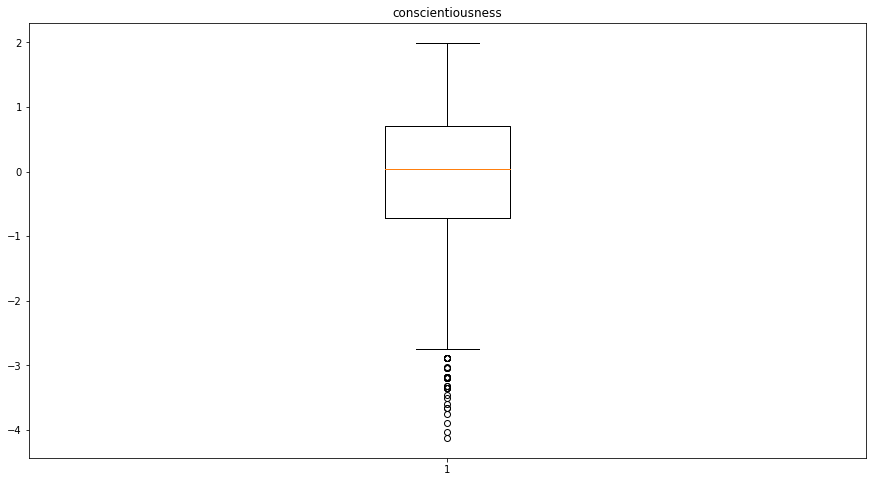

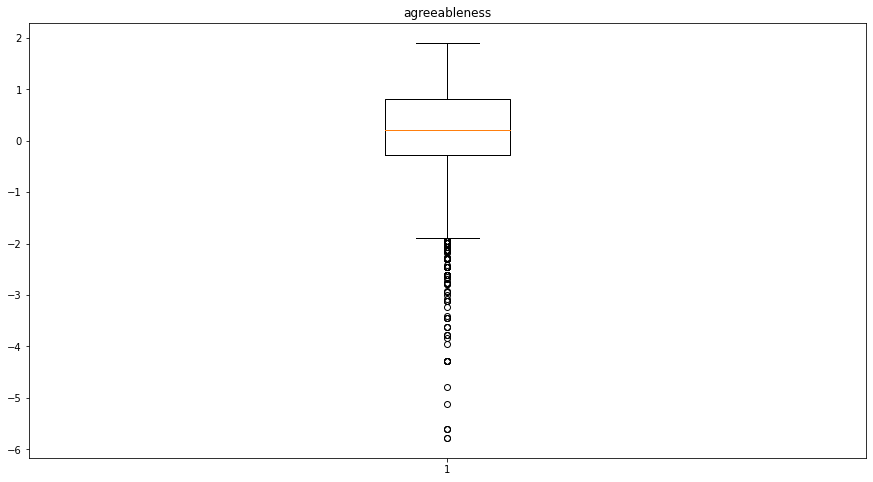

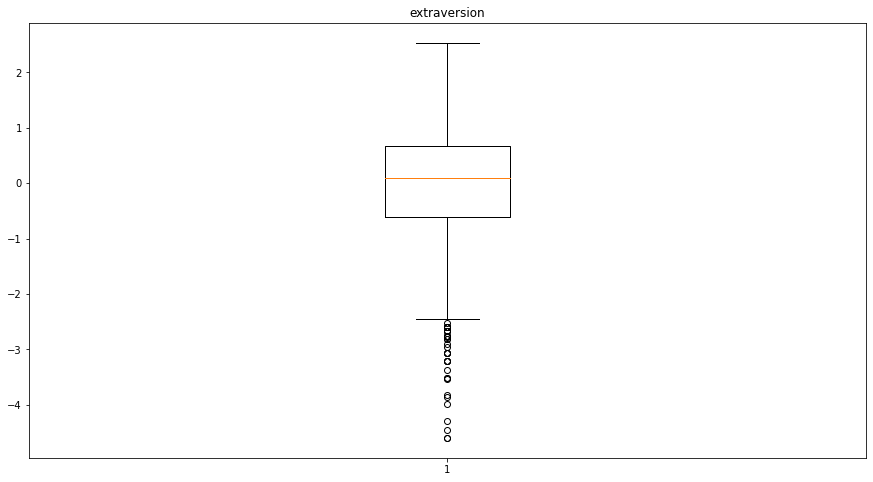

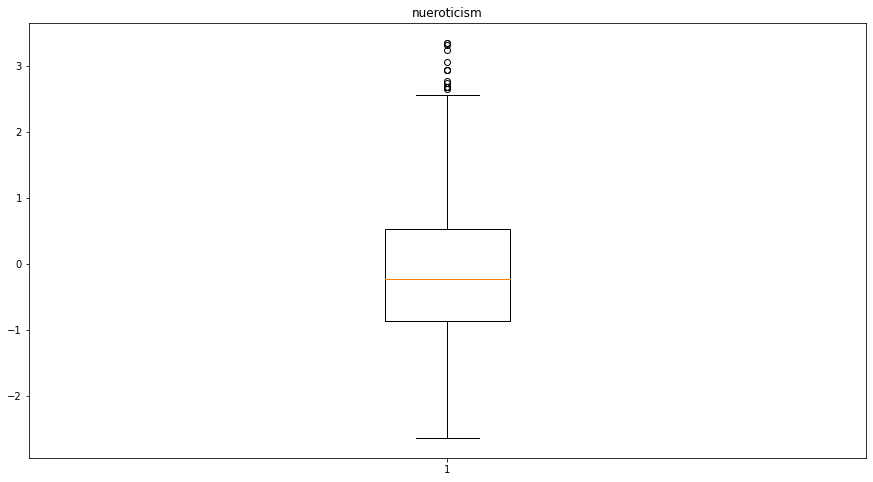

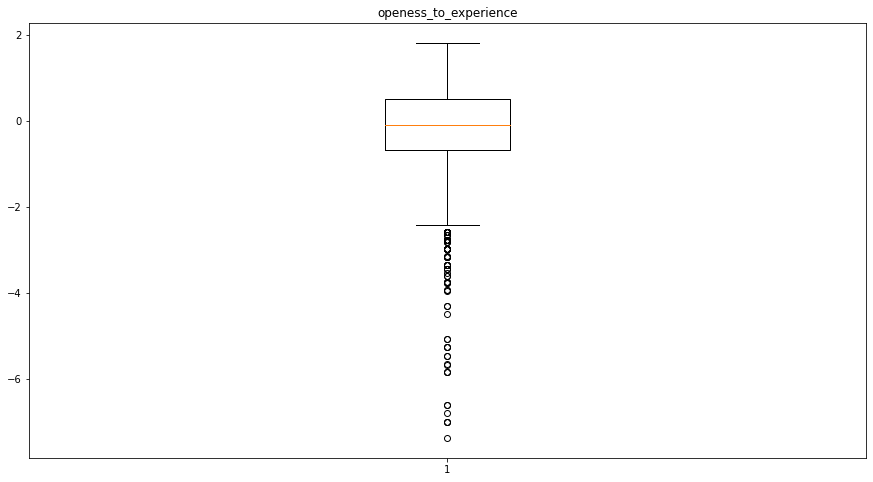

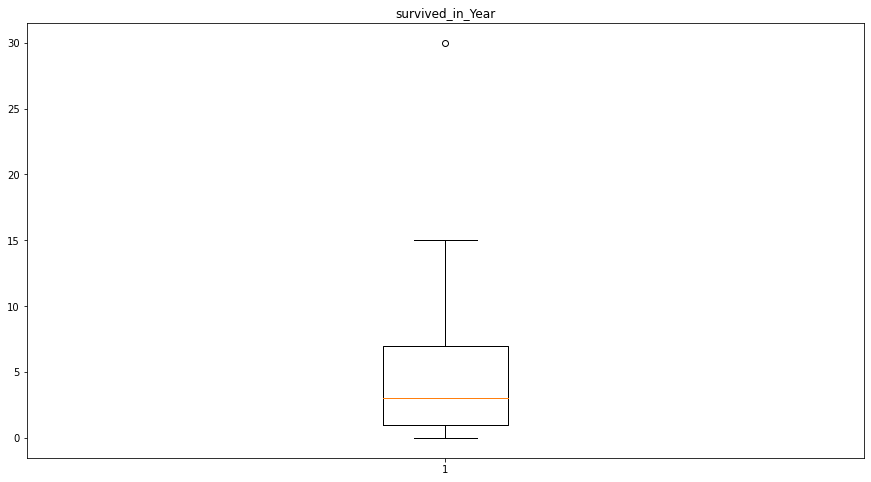

In [38]:
# check outlier using boxplot
for col in data:
    plt.figure(figsize=(15,8))
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()


In [39]:
def check_outlier(df,var):
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    return df[(df[var]<lower_bound) | (df[var]>upper_bound)]
for clm in data:
    print(clm, '=',len(check_outlier(df,clm)))

Salary = 109
10percentage = 30
12graduation = 45
12percentage = 1
CollegeTier = 297
collegeGPA = 38
CollegeCityTier = 0
GraduationYear = 2
English = 15
Logical = 18
Quant = 25
Domain = 246
ComputerProgramming = 2
ElectronicsAndSemicon = 2
ComputerScience = 902
MechanicalEngg = 235
ElectricalEngg = 161
TelecomEngg = 374
CivilEngg = 42
conscientiousness = 39
agreeableness = 123
extraversion = 40
nueroticism = 15
openess_to_experience = 95
survived_in_Year = 1


<AxesSubplot:>

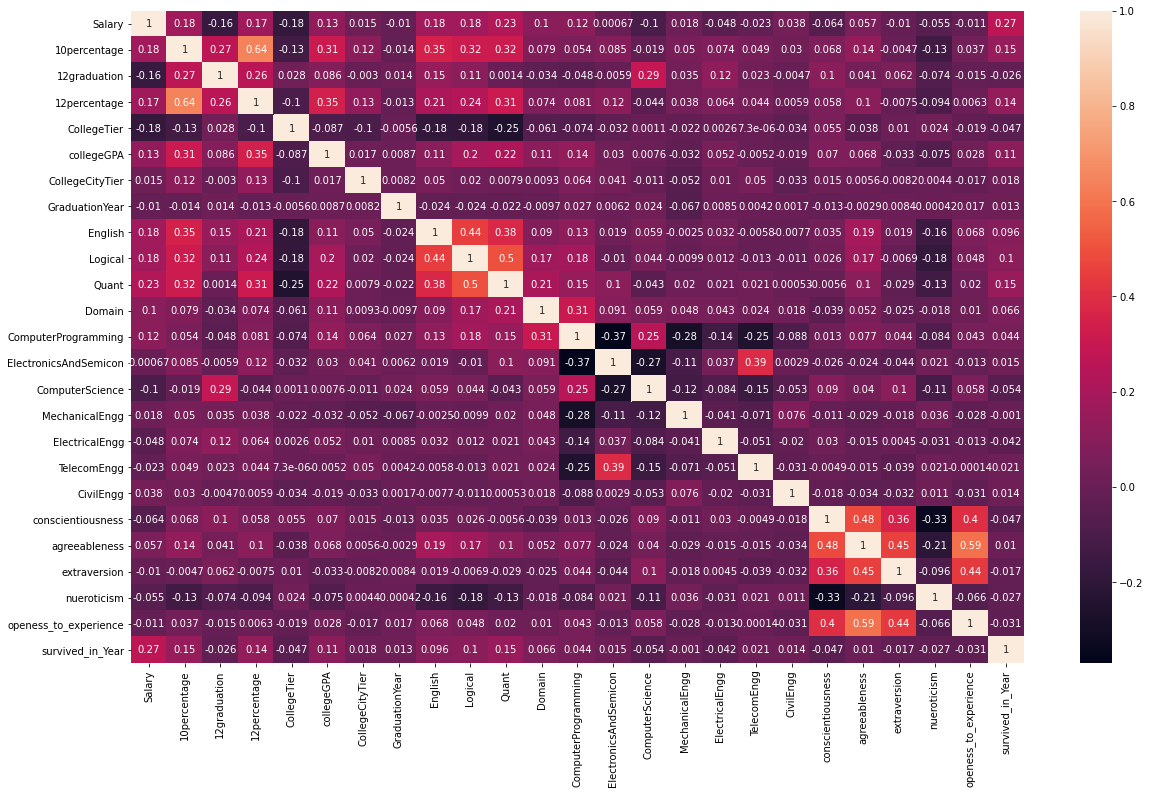

In [40]:
plt.figure(figsize = (20,12))
sns.heatmap(df.corr(),annot = True)

In [41]:
df.columns

Index(['Salary', 'Designation', 'JobCity', 'Gender', 'DOB', '10percentage',
       '10board', '12graduation', '12percentage', '12board', 'CollegeTier',
       'Degree', 'Specialization', 'collegeGPA', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'survived_in_Year'],
      dtype='object')

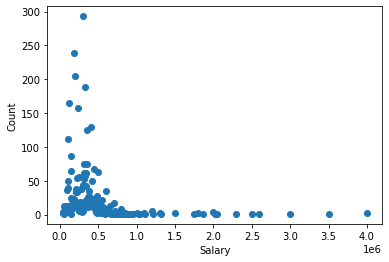

In [42]:
plt.scatter(df['Salary'].value_counts().index, df['Salary'].value_counts().values)
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

In [43]:
df.columns

Index(['Salary', 'Designation', 'JobCity', 'Gender', 'DOB', '10percentage',
       '10board', '12graduation', '12percentage', '12board', 'CollegeTier',
       'Degree', 'Specialization', 'collegeGPA', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'survived_in_Year'],
      dtype='object')

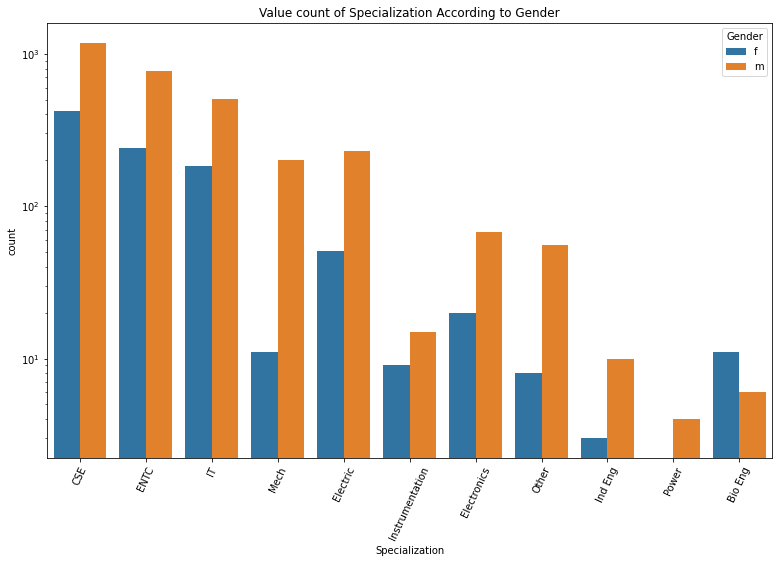

In [44]:
plt.figure(figsize = (13,8))
sns.countplot(x='Specialization',hue = "Gender", data = df,log = True)
plt.xticks(rotation=65)
plt.title("Value count of Specialization According to Gender")
plt.show()


In [45]:
df.columns

Index(['Salary', 'Designation', 'JobCity', 'Gender', 'DOB', '10percentage',
       '10board', '12graduation', '12percentage', '12board', 'CollegeTier',
       'Degree', 'Specialization', 'collegeGPA', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'survived_in_Year'],
      dtype='object')